# Welcome to “PUBG” Game ranking prediction Final Project


![](https://thumbs.gfycat.com/SlimyInsignificantDolphin-max-1mb.gif)

## Importing the required libraries for this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
import warnings
warnings.filterwarnings("ignore")

## Loading the Data

###Reduce Memory Usage

The size of the PUBG dataset is pretty big for a My laptop so here's a script to make the dataset smaller without losing information.

It uses the following approach:
- Iterate over every column
- Determine if the column is numeric
- Determine if the column can be represented by an integer
- Find the min and the max value
- Determine and apply the smallest datatype that can fit the range of values

## Memory saving function used from https://www.kaggle.com/gemartin/load-data-reduce-memory-usage. 

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

## Loading CSV files to DataSet

In [3]:
%%time
train = pd.read_csv('/Users/mac/Desktop/Maching learing/Final_project/课程项目数据集/题目一/game_train.csv')
train = reduce_mem_usage(train)
test = pd.read_csv('/Users/mac/Desktop/Maching learing/Final_project/课程项目数据集/题目一/game_test.csv')
test = reduce_mem_usage(test)
print(train.shape, test.shape)

Memory usage of dataframe is 778.80 MB --> 268.55 MB (Decreased by 65.5%)
Memory usage of dataframe is 198.03 MB --> 67.19 MB (Decreased by 66.1%)
(3519961, 29) (927005, 28)
CPU times: user 31.6 s, sys: 15.8 s, total: 47.4 s
Wall time: 1min 29s


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3519961 entries, 0 to 3519960
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints   

In [5]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.000000,5,0,0.6400
1,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.800003,2,0,0.7755
2,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.699997,3,0,0.1667
3,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.750000,2,0,0.1875
4,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.500000,1,1497,0.0000


In [6]:
train.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3519956,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,327.700012,3,2,0,4,...,0,180.399994,0,0.000,0,0,845.599976,3,0,0.2414
3519957,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.000000,0,0,0,74,...,0,1292.000000,0,0.000,0,0,1019.000000,3,1507,0.1786
3519958,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.150002,0,0,0,69,...,0,0.000000,0,0.000,0,0,81.699997,6,0,0.2935
3519959,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.060001,0,0,0,66,...,0,0.000000,0,2.184,0,0,788.700012,4,0,0.4815
3519960,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.399994,1,1,2,11,...,2,0.000000,0,0.000,0,0,2748.000000,8,0,0.8000


![alt text](https://thumbs.gfycat.com/LavishSereneDrever-size_restricted.gif)

# ##Part 1: Exploratory Data Analysis

###Unique count of Id, groupId, matchId



In [7]:
for i in ['Id','groupId','matchId']:
    print(f'unique [{i}] count:', train[i].nunique())

unique [Id] count: 3519961
unique [groupId] count: 1607103
unique [matchId] count: 37965


### Exploring Different Match Type
PUBG offers 3 different game modes:
- Solo - One can play alone (solo,solo-fpp,normal-solo,normal-solo-fpp)
- Duo - Play with a friend (duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp)
- Squad - Play with 4 friends (squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp,flaretpp)

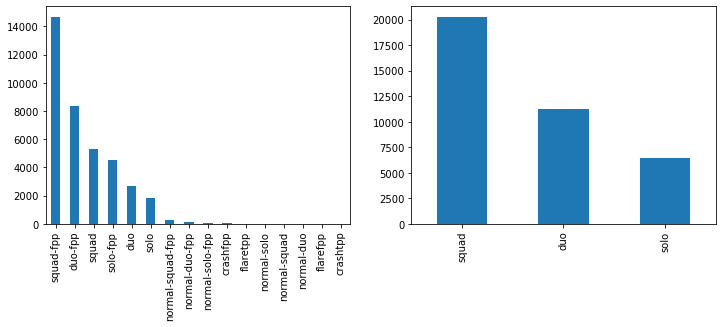

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])

mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
train['matchType'] = train['matchType'].apply(mapper)
train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

###Player Analysis

In [9]:
def mergeList(list1,list2):
    return list(itertools.product(list1,list2))
match = train.groupby(['matchType','matchId']).size().to_frame('players in match')
group = train.groupby(['matchType','matchId','groupId']).size().to_frame('players in group')
pd.concat([match.groupby('matchType').describe()[mergeList(['players in match'],['min','mean','max'])], 
           group.groupby('matchType').describe()[mergeList(['players in group'],['min','mean','max'])]], axis=1)

players in match                   players in group                
                       min       mean    max              min      mean   max
matchType                                                                    
duo                    7.0  92.968636  100.0              1.0  2.050126  72.0
solo                   1.0  89.044084  100.0              1.0  1.039483  64.0
squad                  5.0  93.746807  100.0              1.0  3.491992  74.0

In [10]:
print(group['players in group'].nlargest(5))

matchType  matchId         groupId       
squad      b30f3d87189aa6  14d6b54cdec6bc    74
duo        3e029737889ce9  b8275198faa03b    72
solo       41a634f62f86b7  128b07271aa012    64
duo        7e93ce71ac6f61  7385e5fe214021    49
squad      3c2531adf5b942  e52a2e6ca30474    36
Name: players in group, dtype: int64


#Check correlation of the feature with Winning Percentage

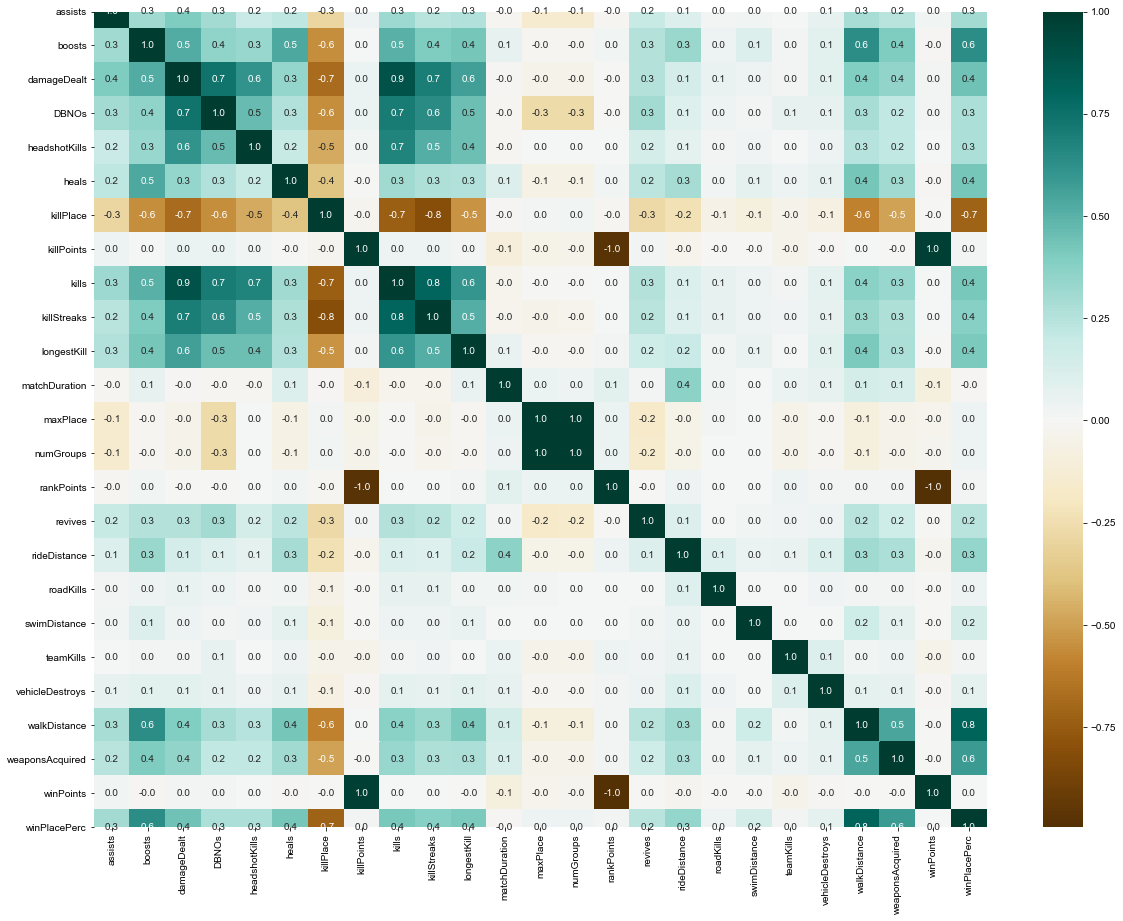

In [11]:
corr = train.corr()
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(train.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

# Part 2: Data Cleaning: Outlier Detection and Removal - Finding the fraudsters

## Analysing the Kills

![alt text](https://steamuserimages-a.akamaihd.net/ugc/842590018019929617/58725F9B0995477885F13874DF23461A6F47D90F/)

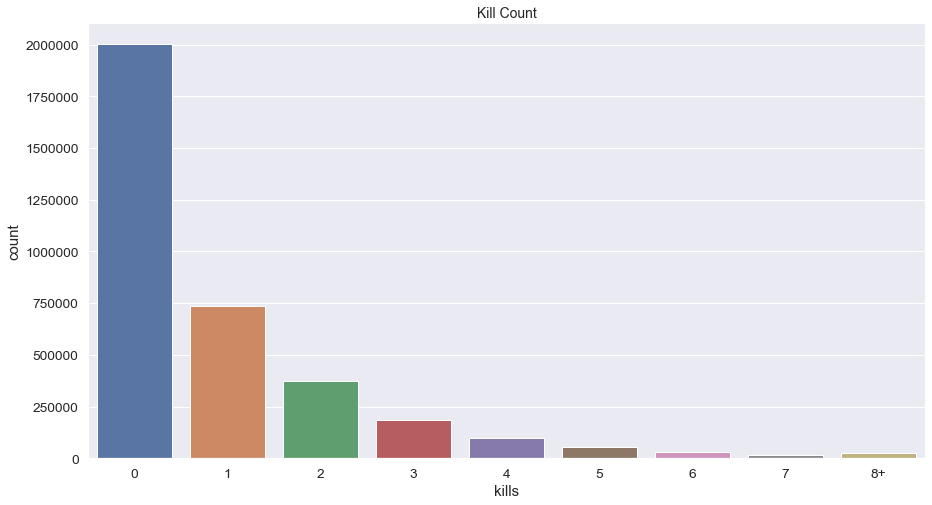

In [12]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,8))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=14)
plt.show()

It seems most of the people cannot even make a single kill. But atleast they deal with some damage

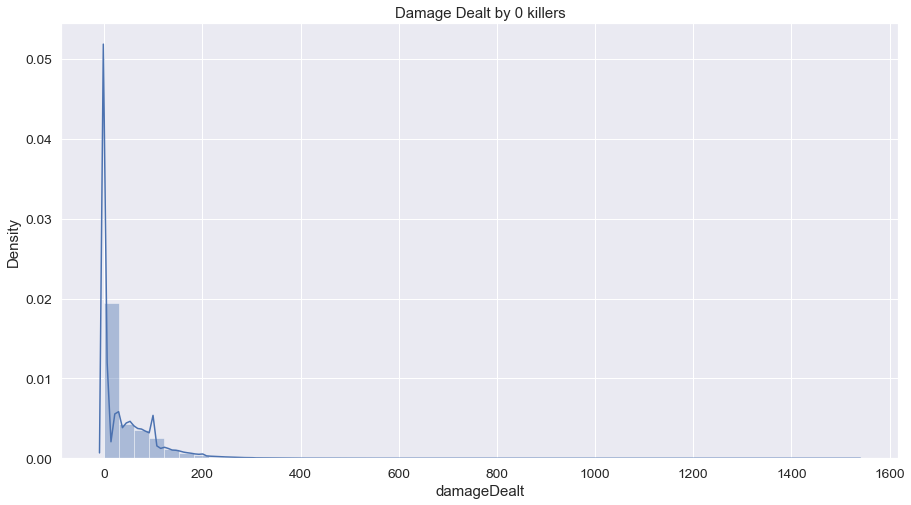

In [13]:
data = train.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,8))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

Well there are few people who win without even making a single kill or dealing with damage.

In [14]:
print("A total of {} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(train)))
data1 = train[train['damageDealt'] == 0].copy()
print("A total of {} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(train)))

A total of 13180 players (0.3744%) have won without a single kill!
A total of 3798 players (0.1079%) have won without dealing damage!


###Effect of Kiiling on Winning percentage

As shown below by the increasing mean of win percentage placement, we found that kill count was correlated with our target variable, which makes sense because more kills usually means a player is better skilled and will rank closer to the top.



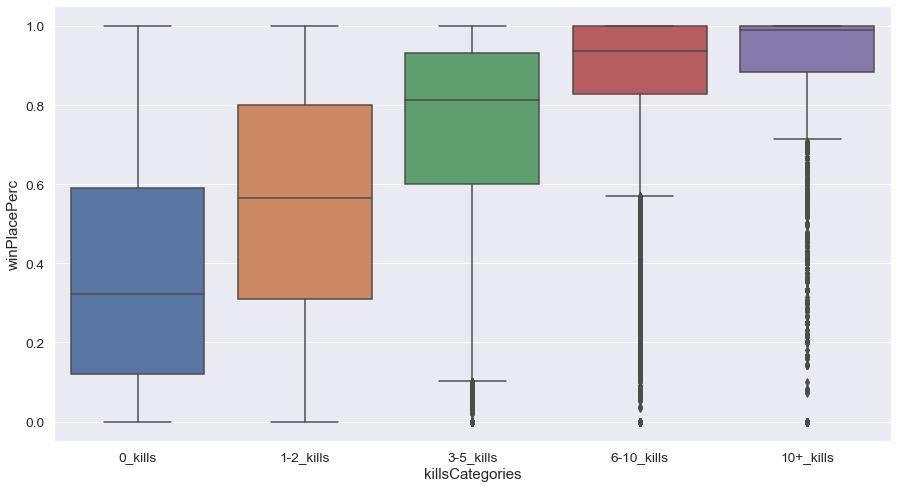

In [15]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

Inference: kills has a high correlation with winPlacePerc.

## Analysing Running

![alt text](https://cdn.dribbble.com/users/1373613/screenshots/5419266/______-__.gif)

In [16]:
print("{} players ({:.4f}%) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(train)))

77777 players (2.0363%) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard (more possible).


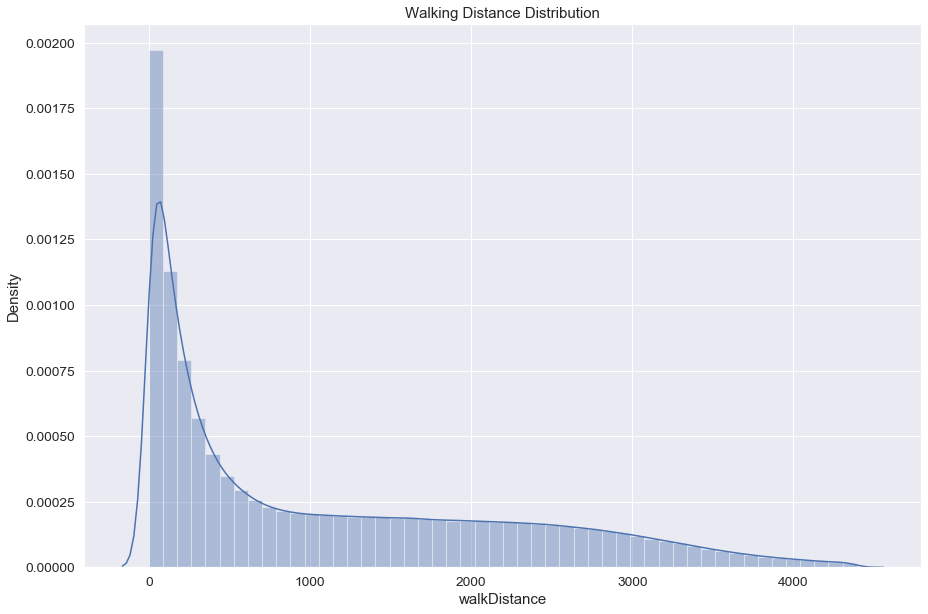

In [17]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

### Analysing Running: Effect of Running on Winning Percentage

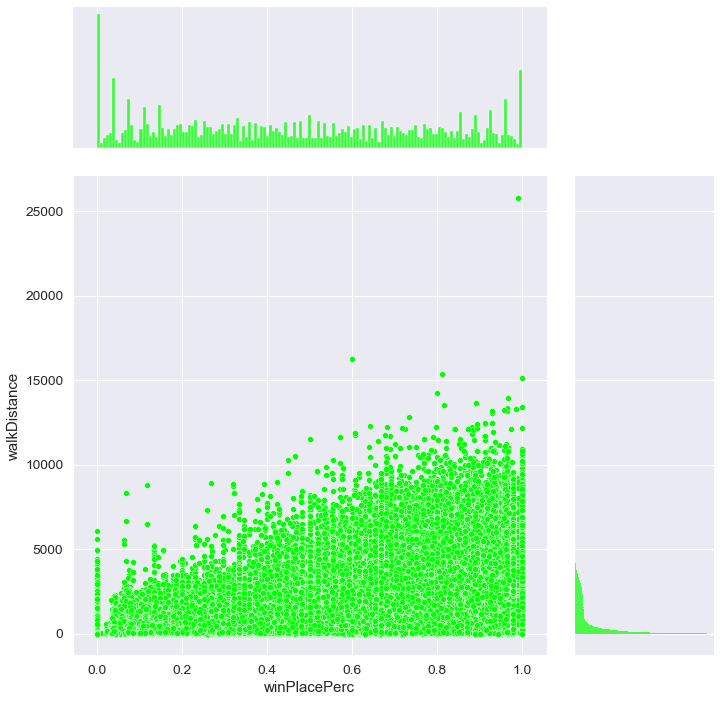

In [18]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train, height=10, ratio=3, color="lime")
plt.show()

**Inference:** *Walking* has a high correlation with *winPlacePerc*.

## Analysing Riding

In [19]:
print("An average person drives for {:.1f}m, 99% of people have drived {}m or less, while THE RIDER rode for {}m.".format(train['rideDistance'].mean(), train['rideDistance'].quantile(0.99), train['rideDistance'].max()))

An average person drives for 604.6m, 99% of people have drived 6961.0m or less, while THE RIDER rode for 40710.0m.


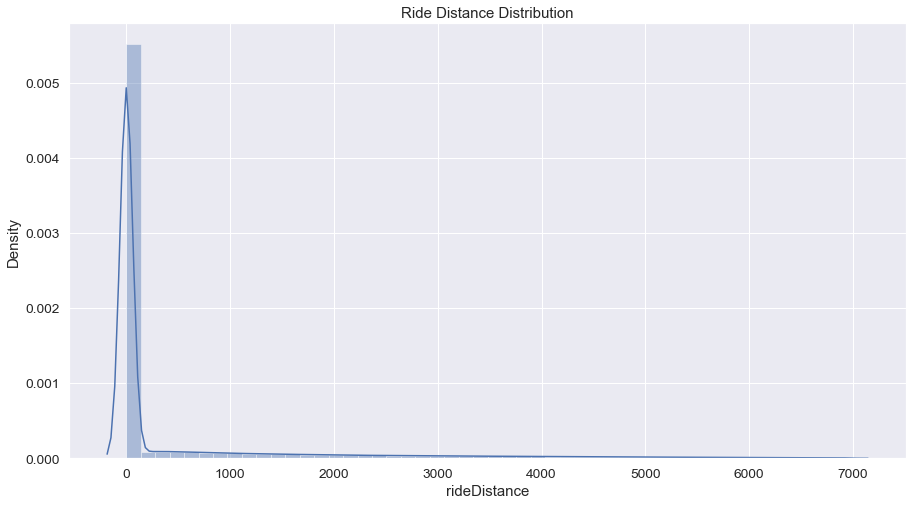

In [20]:
data = train.copy()
data = data[data['rideDistance'] < train['rideDistance'].quantile(0.99)]
plt.figure(figsize=(15,8))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

In [21]:
print("{} players ({:.4f}%) drived for 0 meters. This means that they like trekking more than riding.".format(len(data[data['rideDistance'] == 0]), 100*len(data1[data1['rideDistance']==0])/len(train)))

2620761 players (23.1050%) drived for 0 meters. This means that they like trekking more than riding.


## Analysing Riding: Effect of Riding on Winning Percentage

Theoretically, if a player is able to destroy the vehicle it indicates the he/she is skilled. Let's check if this theory is correct.

**Inference:** Destroying vehicles increases your chances of winning!

## Analysing Healing and Boosting

In [22]:
print("In the game on an average a person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))
print("In the game on an average a person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))

In the game on an average a person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 80.
In the game on an average a person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 33.



## Analysing Healing and Boosting: Effect of Healing & Boosting on Winning Percentage

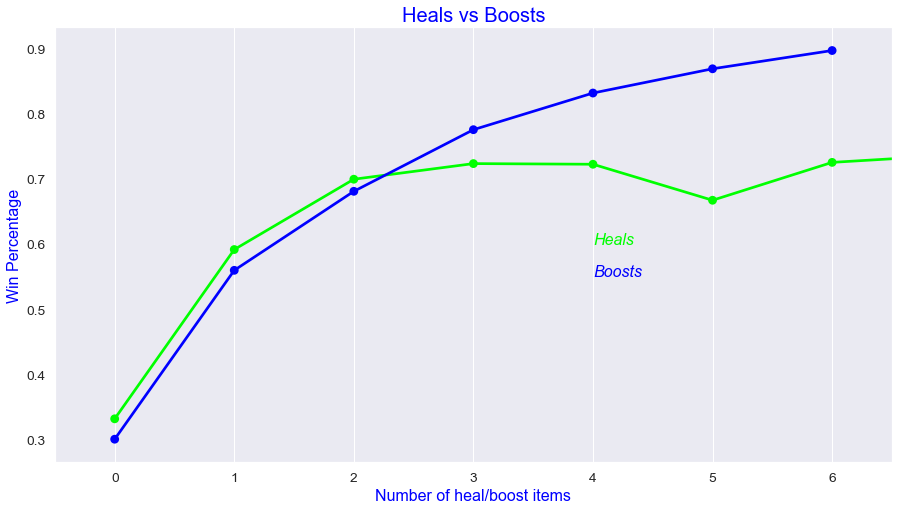

In [23]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(15,8))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 16,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 16,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 16,color='blue')
plt.ylabel('Win Percentage',fontsize = 16,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

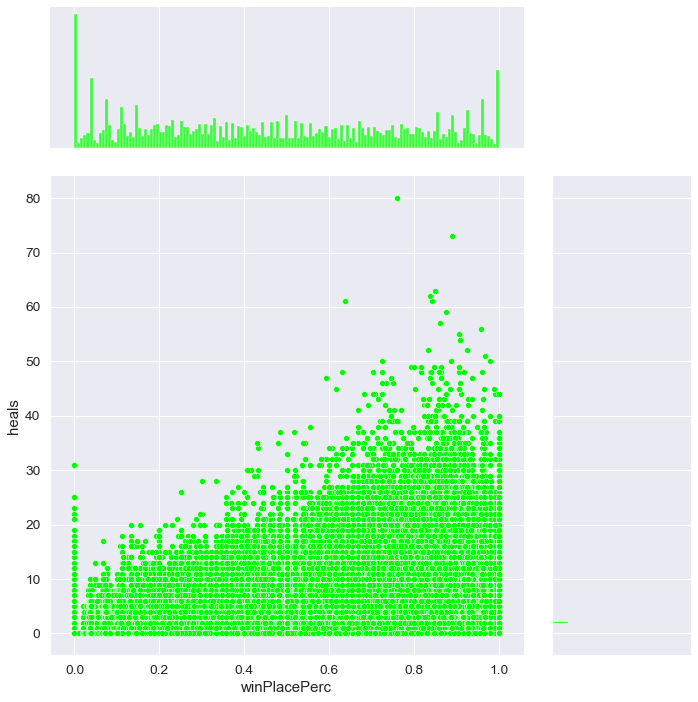

In [24]:
sns.jointplot(x="winPlacePerc", y="heals", data=train, height=10, ratio=3, color="lime")
plt.show()

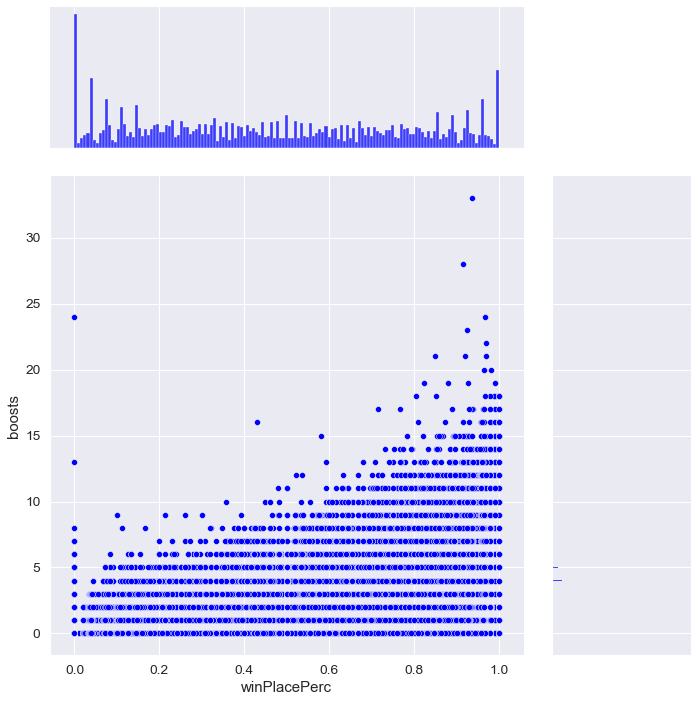

In [25]:
sns.jointplot(x="winPlacePerc", y="boosts", data=train, height=10, ratio=3, color="blue")
plt.show()

**Inference:** Both healing and boosts have a high correlation with winning, however boosts matter more. Both the plots shows abnormal behaviour at 0


##Effect of Killing in different Game type: Solo, Duos and Squad on Winning Percentage

In [26]:
solos = train[train['numGroups']>50] #Solo game played by more than 50 different groups
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)] #Duo game can consist of a maximum of 50 groups(50x2=100) 
squads = train[train['numGroups']<=25] # Squad game can consist a maximum of 25 groups(25x4=100)
print("{} ({:.2f}%) of games are solo, {} ({:.2f}%) are duo and {} ({:.2f}%) are squad games.".format(len(solos), 100*len(solos)/len(train), len(duos), 100*len(duos)/len(train), len(squads), 100*len(squads)/len(train),))

566452 (16.09%) of games are solo, 2604959 (74.01%) are duo and 348550 (9.90%) are squad games.


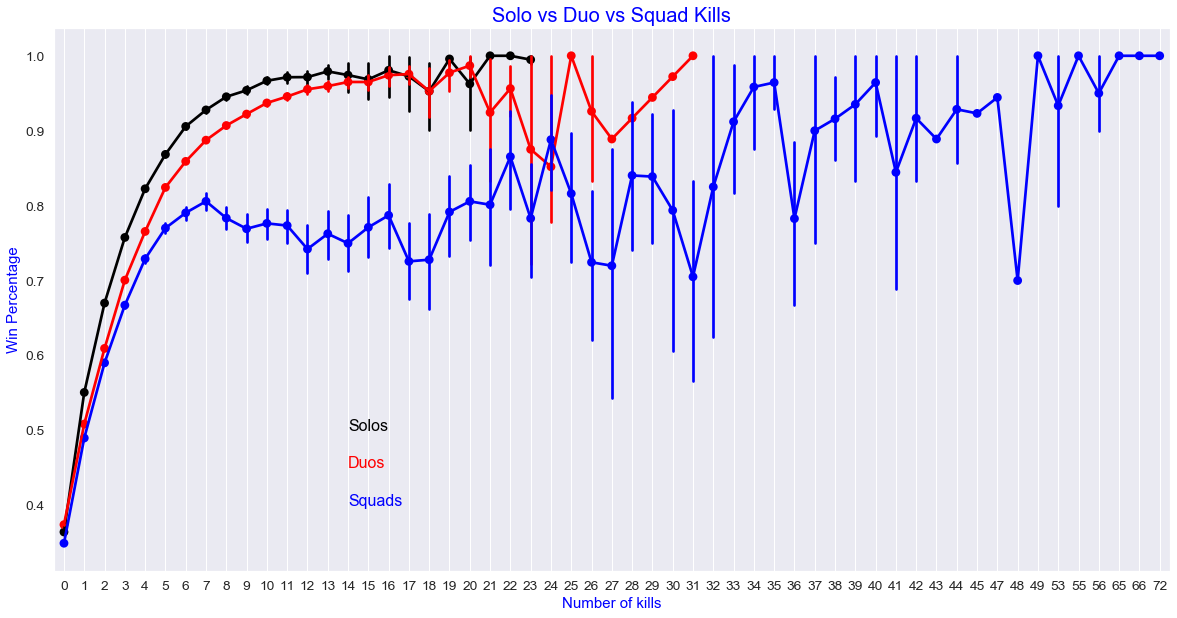

In [27]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.6)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='red',alpha=0.6)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='blue',alpha=0.6)
plt.text(14,0.5,'Solos',color='black',fontsize = 16)
plt.text(14,0.45,'Duos',color='red',fontsize = 16)
plt.text(14,0.4,'Squads',color='blue',fontsize = 16)
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

#Part 2: Data Cleaning: Outlier Detection and Removal - Finding the fraudsters



## Outliers: How do we catch the fraudsters in the game?

###Illegal Match

In [28]:
# Check row with NaN value
train[train['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2172969,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [29]:
train.drop(train[train['winPlacePerc'].isnull()].index, inplace=True)

In [30]:
train.shape

(3519960, 29)

## Anomalies in Killing: Aim Hacks

Calculating the totalDistance travelled by a player which is the sum total of rideDistance, walkDistance adn swimDistance

In [31]:
# Engineer a new feature _totalDistance
train['_totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']

Create a new feature 'headshot_rate'. We see that the most players score in the 0 to 10% region. However, there are a few anomalies that have a headshot_rate of 100% percent with more than 9 kills!

In [32]:
# Engineer _headshot_rate feature --- headshots made per kill
train['_headshot_rate'] = train['headshotKills'] / train['kills']
train['_headshot_rate'] = train['_headshot_rate'].fillna(0)

In [33]:
#Defining some functions for plotting graphs, we will be needing a lot of countplot and distplot
def show_countplot(column):
    plt.figure(figsize=(15,8))
    sns.countplot(data=train, x=column).set_title(column)
    plt.show()
    
def show_distplot(column):
    plt.figure(figsize=(15, 8))
    sns.distplot(train[column], bins=50)
    plt.show()

### Inhumane kills

Some rows in our dataset have weird characteristics. The players could be fraudsters, maniacs or just anomalies. Removing these outliers will likely improve results.

Let's take a look at the players who make these shots.

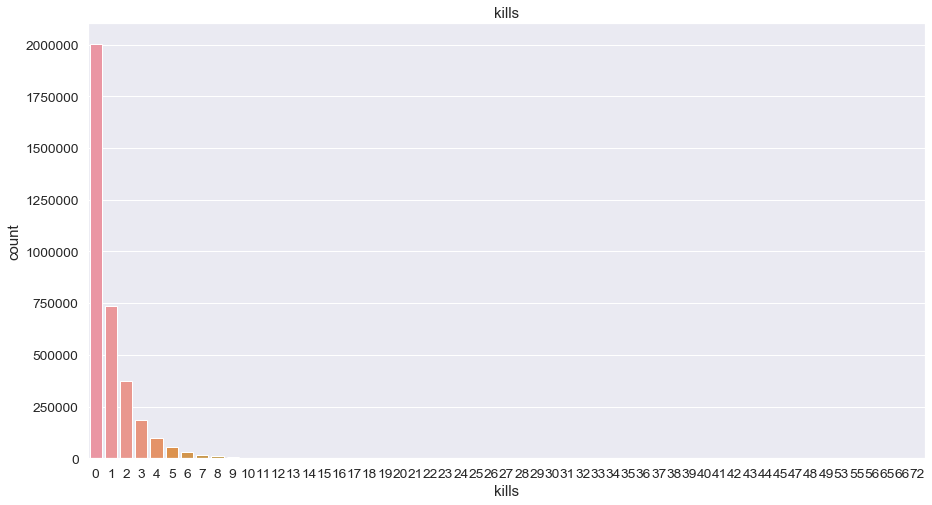

In [34]:
show_countplot('kills')

In [35]:
# Is it even possible to kill more than 40 people by acquiring more than 55 weapons and maintaining a total distance of less than 100m?
train[(train['kills'] >= 40) & (train['weaponsAcquired'] > 55) & (train['_totalDistance'] < 100.0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
123850,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0,0.0,0,0,23.709999,61,0,0.7000,23.709999,0.250000
609906,2ade4369bccd12,9f9e64a3db8384,e024bf51bf1799,12,0,5557.0,0,7,4,1,...,0,0.0,0,0,85.550003,66,0,1.0000,85.550003,0.127273
1090812,f241fdbb4f94c6,fadbbc4cbb3e06,e024bf51bf1799,9,0,3707.0,0,5,1,5,...,0,0.0,0,0,46.709999,72,0,0.7778,46.709999,0.121951


In [36]:
# Is it even possible to kill more than 40 people without using any heals?
train[(train['kills'] >= 40) & (train['heals'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
126727,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,0,0.0,1,0,718.299988,16,1500,1.0,718.299988,0.952381
1833845,dbc81aa64a7e3d,c50fe5c54e8bb6,5d58307bae9b50,8,0,4106.0,31,3,0,1,...,0,0.0,0,0,1282.000000,22,0,1.0,1282.000000,0.075000
2059612,436d1530e9eb00,5c974c2bb9d9f0,fe7043ee6221c8,5,0,4347.0,0,31,0,1,...,0,0.0,0,0,134.300003,36,0,1.0,134.300003,0.584906
3106986,579949f753978c,108f4c00d80882,ff9cd80c0d8fb7,1,2,3680.0,0,35,0,1,...,0,0.0,0,0,1180.000000,2,1500,1.0,1180.000000,0.875000


In [37]:
# Drop 'fraudsters' with inhumane kill counts
train.drop(train[(train['kills'] >= 40) & (train['weaponsAcquired'] > 55) & (train['_totalDistance'] < 100.0)].index, inplace=True)
train.drop(train[(train['kills'] >= 40) & (train['heals'] == 0)].index, inplace=True)

### 100% Headshot Kills

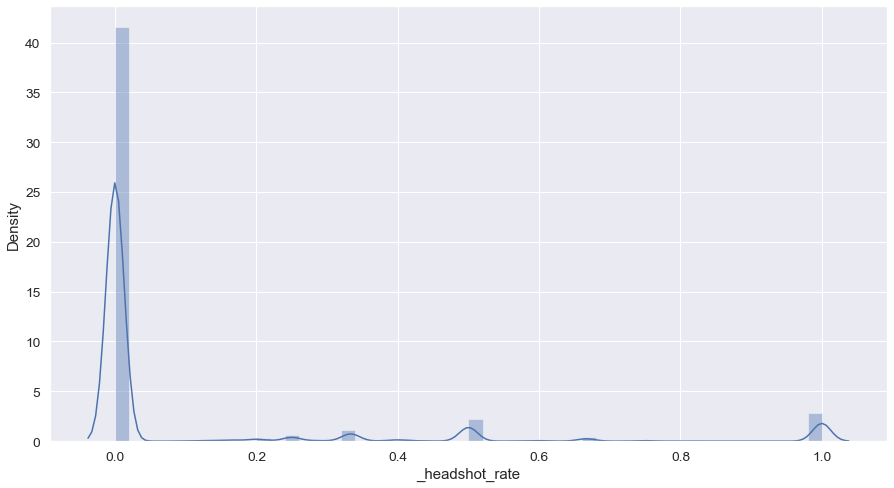

In [38]:
# Plot the distribution of headshot_rate
show_distplot('_headshot_rate')

In [39]:
# List of Hitman who made more than 10 kills and all the kills were done by headshot(perfect kill)
display(train[(train['_headshot_rate'] == 1) & (train['kills'] >=10)].shape)
train[(train['_headshot_rate'] == 1) & (train['kills'] >= 10)].head(10)

(16, 31)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
223126,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0,0.0,0,0,2939.0,5,0,0.8462,2939.000000,1.0
689584,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,0,0.0,0,0,2105.0,5,1587,1.0000,2105.000000,1.0
719410,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,0,0.0,2,0,2761.0,7,1519,0.9630,7948.000000,1.0
762523,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,0,0.0,0,0,2458.0,4,1562,1.0000,3476.000000,1.0
854152,1c245ed99b5f96,e42d09a9b8463a,5cec236bce68eb,0,5,1218.0,8,11,3,1,...,0,0.0,0,0,2932.0,4,0,1.0000,8178.000000,1.0
924390,c4f80d4be5c561,b4a7892189b5dd,c7f7733ebbd447,0,4,1065.0,6,10,1,1,...,0,0.0,0,0,2450.0,7,1468,1.0000,2858.899902,1.0
1283942,7ef0d4adf33d2e,c76984ab16e2cb,9b340203c52b43,3,4,1398.0,8,10,2,1,...,0,0.0,0,0,3024.0,3,1558,1.0000,3114.419922,1.0
1388180,74e268b6d4870b,53bfcb6d8229f6,36579d5c2e52bc,0,7,1503.0,0,15,2,1,...,0,0.0,0,0,2990.0,7,0,1.0000,5008.000000,1.0
1786916,d8474df8d8283a,50c8a5b906d89d,c6da477a07f4aa,0,7,1569.0,0,14,0,1,...,0,0.0,0,0,2209.0,3,0,1.0000,4994.000000,1.0
1880912,48bd6fdf8719a4,d8a6b7a95481d8,360caa30aabd16,0,8,1290.0,0,14,1,1,...,0,0.0,0,0,2432.0,7,1500,0.9897,2993.399902,1.0


It is unclear if these players are cheating or are the legends so for now we are not deleting these players from the dataset.

###Killing without Moving
Identify the fraudsters who can making kills without even moving. So for this  we first identify the totalDistance travelled by a player and then set a boolean value to True if someone got kills without even moving a single inch. 

In [40]:
# Create feature killsWithoutMoving
train['_killsWithoutMoving'] = ((train['kills'] > 0) & (train['_totalDistance'] == 0))
# Check players who kills without moving
display(train[train['_killsWithoutMoving'] == True].shape)
train[train['_killsWithoutMoving'] == True].head(10)

(1213, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
1459,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.000000,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,0.0,0.000000,True
5285,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.600006,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,0.0,0.000000,True
11598,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.800003,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,0.0,0.000000,True
12378,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.000000,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,0.0,1.000000,True
16596,40871bf43ddac7,2cea046b7d1dce,0600f86f11c6e4,0,0,506.100006,4,1,3,7,...,0.0,0,0,0.0,8,0,0.8000,0.0,0.166667,True
19564,aeced11d46de19,d4009ffa95bb4f,73f3ed869c9171,2,0,529.900024,0,2,11,12,...,0.0,0,0,0.0,8,0,0.8571,0.0,0.285714,True
20377,6626c4d47cffa0,ee3fe5c0d917c3,341341834b7941,0,1,128.899994,0,1,6,53,...,0.0,0,0,0.0,12,1500,0.2857,0.0,0.500000,True
25950,837f51dcdb9298,b7bbb0f3070761,25830709cb9033,1,0,172.800003,0,0,0,67,...,0.0,0,0,0.0,6,1500,0.9474,0.0,0.000000,True
26366,50f9636603d5ee,fc5855b508b2a6,8754837629fdfc,5,0,579.599976,0,0,0,15,...,0.0,1,0,0.0,12,1500,0.0000,0.0,0.000000,True
27625,3b229e8aea7715,cab22b5e0d53e2,ec723e85a37cab,1,0,113.400002,2,0,3,33,...,0.0,0,0,0.0,18,0,0.1667,0.0,0.000000,True


In [41]:
# Drop kill without moving 'fraudsters'
train.drop(train[train['_killsWithoutMoving'] == True].index, inplace=True)

###Longest Kill

Most kills are made from a distance of 100 meters or closer. However there are some players (outliers) who make a kill from more than 1km away. These players are probably fraudsters.

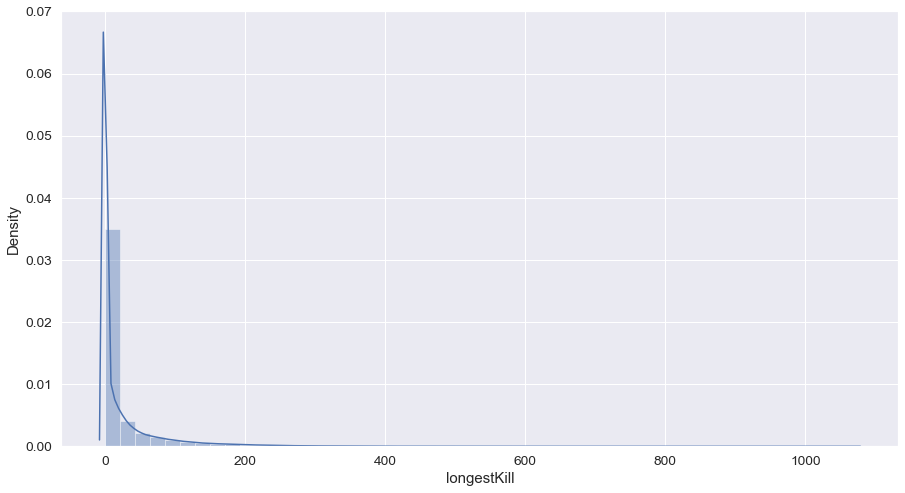

In [42]:
show_distplot('longestKill')

Is it even posssible to snipe (kill) someone from a distance > 1Km in this game?


Let's take a look at the players who took these shots.

In [43]:
train[train['longestKill'] >= 1000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
160008,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.900024,5,1,1,5,...,0.000000,0,1,3052.000000,9,0,0.9231,3775.199951,0.250000,False
189965,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.000000,8,5,7,18,...,0.000000,0,0,48.869999,38,1500,0.5385,48.869999,0.454545,False
256841,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.000000,0,0,0,9,...,0.000000,0,0,1264.000000,26,0,1.0000,2981.000000,0.000000,False
957235,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.000000,0,7,0,1,...,0.000000,0,0,2848.000000,4,1500,0.9412,2848.000000,0.466667,False
1595741,5ff0c1a9fab2ba,2d8119b1544f87,904cecf36217df,3,3,1302.000000,0,6,5,15,...,0.000000,0,0,133.199997,43,0,0.6000,133.199997,0.545455,False
1680282,42df3102cb540b,7d9b2be15b355b,610d78f3affd2e,5,0,2500.000000,0,7,1,2,...,0.000000,2,0,464.500000,52,0,0.0000,464.500000,0.318182,False
1704218,4b9f61bac5eb0a,bc717b964f3bbe,838cb9a3c94598,3,0,945.400024,0,0,0,11,...,0.000000,0,0,844.700012,14,0,0.5714,844.700012,0.000000,False
2052484,24e0fec84c18e9,8404855ca02e48,e886a8ebb702cf,7,0,1684.000000,0,4,7,11,...,0.000000,0,0,1115.000000,54,1500,0.5714,4851.000000,0.307692,False
2360834,7f77051c7cef52,d6579a630399b5,4784f7d9a06b51,3,5,1025.000000,5,2,5,2,...,87.959999,0,0,3998.000000,7,0,1.0000,4085.959961,0.333333,False
2439849,f19a76e8d7ac52,624d65c529f87c,de19b70121c40f,3,0,1038.000000,0,0,0,32,...,0.000000,0,0,270.000000,28,1500,0.8571,270.000000,0.000000,False


In [44]:
# Drop longestKill 'fraudsters'
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)

###Road Kills

In [45]:
# Players who got more than 10 roadKills
train[train['roadKills'] > 10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
2164506,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,...,5.297,0,0,1277.000000,0,1371,0.4286,1282.302002,0.00,False
2191478,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.0,0,0,0,1,...,0.000,0,0,816.599976,5,1533,0.4713,4934.600098,0.00,False
2288827,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,...,0.000,0,0,3150.000000,4,1568,1.0000,5876.000000,0.05,False


In [46]:
# Drop roadKill 'fraudsters'
train.drop(train[train['roadKills'] > 10].index, inplace=True)

## Finding anomaly in travelling

 PUBG map is 8*8 km and each yellow square represents 1km.
![alt text](https://gamepedia.cursecdn.com/battlegrounds_gamepedia_en/thumb/e/ea/Map.jpg/800px-Map.jpg?version=928379c81f738c9cd92cef477c46f8c3)

In [47]:
train[['walkDistance', 'rideDistance', 'swimDistance']].describe()

,walkDistance,rideDistance,swimDistance
count,3.518723e+06,3.518723e+06,3.518723e+06
mean,1.151177e+03,6.048494e+02,4.513509e+00
std,1.181692e+03,1.506682e+03,3.014919e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.553000e+02,0.000000e+00,0.000000e+00
50%,6.864000e+02,0.000000e+00,0.000000e+00
75%,1.976000e+03,7.555000e-02,0.000000e+00
max,2.578000e+04,4.071000e+04,3.514000e+03


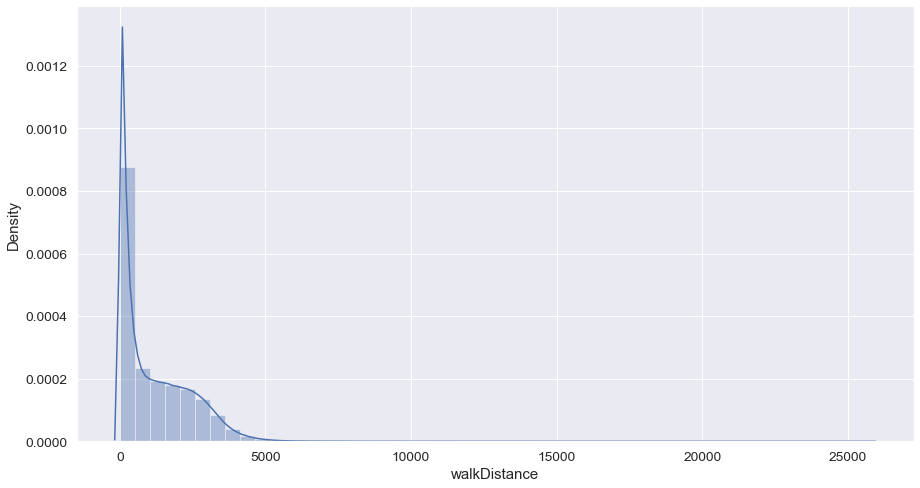

In [48]:
show_distplot('walkDistance')

In [49]:
#Travel Lust and Wandrer ---> They just play to roam around and explore places without killing anyone and how can they travel 13kms in the game?
train[(train['walkDistance'] >= 13000) & (train['kills'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
18291,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.000000,0,0,0,44,...,9.882000,0,0,13530.0,7,0,0.8163,13540.302734,0.0,False
394058,3304d0c68e27f5,503757159d22dd,ce88f9c8c35bdf,0,0,0.000000,0,0,0,46,...,381.899994,0,0,25780.0,0,0,0.9894,26161.908203,0.0,False
900645,3c23cf6c61171f,90b6aaaa2a16b7,a52c5ac7c18311,0,2,0.000000,0,0,27,41,...,80.339996,0,0,13160.0,3,0,0.9643,13240.394531,0.0,False
941026,2dd8f83eb3bd7f,d1e7809ff69bb4,c8585bc8a88aa6,0,0,0.000000,0,0,0,44,...,180.699997,0,0,13360.0,4,0,0.9643,14798.700195,0.0,False
1422858,7b9a750b17e9c6,2d00192e4029c5,6fe77402ddb0e1,0,0,0.000000,0,0,0,55,...,129.399994,0,0,16250.0,3,0,0.6000,16379.440430,0.0,False
1646091,1284474083cc33,fa7e10443cc7df,c62835e88e61a6,0,2,0.000000,0,0,3,48,...,256.899994,0,0,14250.0,8,0,0.8000,15354.600586,0.0,False
1772740,861d1e5a63f3e6,1da6a90addf96d,16f2c51578f323,0,1,0.000000,0,0,5,46,...,389.500000,0,0,15370.0,7,0,0.8125,15759.510742,0.0,False
2367691,fc3fdd39dcd266,f901321bc27871,c0ebfb404aaa47,0,4,75.349998,0,0,0,40,...,42.189999,0,0,13070.0,4,0,0.9286,14902.190430,0.0,False
2627415,25a548c95fa48f,978df298b094ba,99407bcde7569c,0,0,0.000000,0,0,2,39,...,38.439999,0,0,13660.0,1,0,0.8913,13698.454102,0.0,False


In [50]:
# Drop walking anomalies
train.drop(train[(train['walkDistance'] >= 13000) & (train['kills'] == 0)].index, inplace=True)

![](https://i.imgur.com/YkvnR9s.gif)

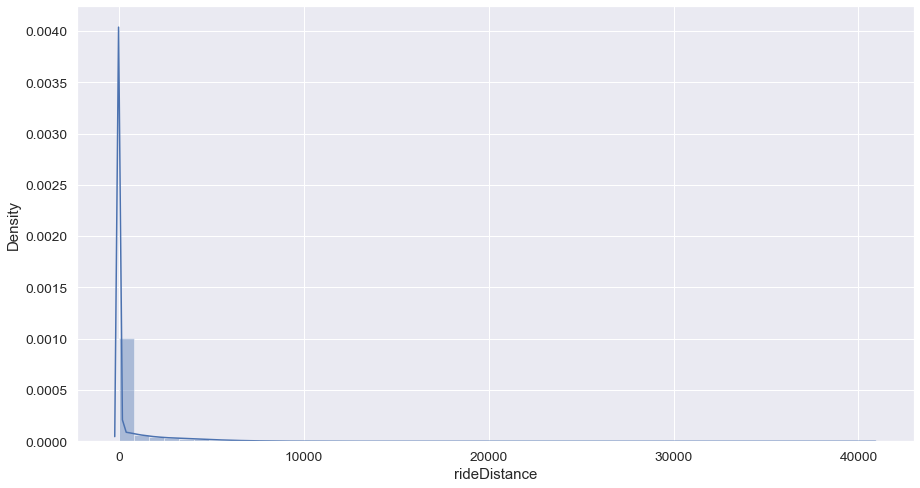

In [51]:
show_distplot('rideDistance')

In [52]:
#Travel Lust and Wandrer ---> They just play to roam around and explore places without killing anyone - How can you ride for 30km?
train[(train['rideDistance'] >= 30000) & (train['kills'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
337822,149e224a2330ae,6d8cb80b3de8ff,f8b8e2643f60ee,0,2,0.000000,0,0,2,43,...,0.0,0,0,402.100006,3,1449,0.8171,32362.099609,0.0,False
479284,8dee54600c67ca,e77f3e175b5959,26bc606cdae6bf,0,0,11.210000,0,0,0,27,...,0.0,0,0,1641.000000,0,1498,0.6800,35611.000000,0.0,False
975325,4bf27787223351,b0140dd17f3238,5ed9c405f7e71d,0,1,0.000000,0,0,10,47,...,0.0,1,0,1473.000000,3,0,0.7979,32483.000000,0.0,False
1365940,9f14f77b6dd9b6,8a2a8ae2506323,904b5fa7f59bc5,0,2,2.389000,0,0,5,19,...,0.0,0,0,542.099976,2,1565,0.6944,38212.101562,0.0,False
2138079,3428324a089608,fa77b4ac736dbf,9b1c87f4016f47,0,1,31.270000,0,0,0,46,...,0.0,0,0,174.100006,1,1530,0.8557,31464.099609,0.0,False
2317812,260efc0cf6b36c,b112f8d21e8185,3e977510ce1d3c,0,0,11.220000,0,0,0,44,...,0.0,0,0,426.600006,2,1619,0.8132,31086.599609,0.0,False
2695596,8e84f4228e5436,c5ca5892142cbd,56775920f704e8,0,0,3.298000,0,0,0,40,...,0.0,0,0,233.699997,5,1497,0.9175,32553.699219,0.0,False
2824259,99f342c6022411,9158efebffecc7,ddbe41fe165c7f,2,2,113.199997,0,0,3,34,...,0.0,0,0,616.200012,4,0,1.0000,31636.199219,0.0,False
3245475,afe34618b04d77,c14f532b283844,732c3b752e055f,0,0,0.000000,0,0,0,42,...,0.0,0,0,560.099976,0,0,0.8478,41270.101562,0.0,False
3285200,a74c1acff09c4f,a1488a2d301bc4,98f74c2a19a67e,0,0,18.760000,0,0,0,51,...,0.0,0,0,27.299999,0,1505,0.6392,30137.300781,0.0,False


In [53]:
# How is it even possible that a player is able to ride and kill without walking even a single meter ?
train[(train['walkDistance'] == 0) & (train['rideDistance'] > 0) & (train['kills'] > 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
832108,c43116d1c3d4e5,bd09c97b67800a,aad60eee7eeb79,0,0,102.199997,0,0,0,34,...,0.0,0,0,0.0,0,1532,0.1250,1757.000000,0.0,False
923583,553f199b5538c5,560c2ba9dcbbd0,afb05e37d884fc,2,0,168.500000,1,0,0,45,...,0.0,0,0,0.0,0,1499,0.0667,391.799988,0.0,False
1758856,a280df87d394fc,61042f8c96538c,a0e8fe0599288c,0,0,100.000000,1,0,0,37,...,0.0,0,0,0.0,0,0,0.1522,534.500000,0.0,False
1886165,adbda59d2f11cd,343d453ffb18c8,cbb5f864c6f532,0,0,100.000000,1,0,0,43,...,0.0,0,0,0.0,0,0,0.0000,262.700012,0.0,False
1956890,b968373063f5a8,536e9c19659ce8,61c90034dc8174,0,0,93.470001,1,0,0,38,...,0.0,0,0,0.0,0,0,0.1429,1360.000000,0.0,False
2302280,2bf1d34142358b,71c15011651348,08dfa30b9390f7,4,0,578.000000,0,0,6,30,...,0.0,0,0,0.0,29,0,0.4000,1277.000000,0.0,False
3070043,98b29b9a3c1d2d,5367c310b33253,32b26ac193c9ee,0,0,100.000000,1,0,0,43,...,0.0,0,0,0.0,0,0,0.0208,82.080002,0.0,False
3343204,5e7e5c37b5bfaa,4b8e96fa341568,73cb1c5f2685f3,0,0,100.000000,1,0,0,40,...,0.0,0,0,0.0,0,0,0.0000,543.500000,0.0,False
3373322,5151e02af2b0ef,ab966381a28eac,560ec48b1f3371,0,0,272.799988,0,0,0,19,...,0.0,0,0,0.0,0,0,0.0879,226.399994,0.0,False


In [54]:
# What was the player doing in the game when total distance travelled by him/her is 0? 
train[(train['_totalDistance'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
95,6adb021f5165ff,58e5500bd40898,de5c692fe25a73,0,0,0.0,0,0,0,68,...,0.0,0,0,0.0,0,847,0.0000,0.0,0.0,False
126,a2bbe20aa8789d,926e8a09bab249,e36e4203ed4831,0,0,0.0,0,0,0,92,...,0.0,0,0,0.0,0,765,0.0000,0.0,0.0,False
199,baaa694658e085,d034728f22cff7,fa71620624d3e7,0,0,0.0,0,0,0,94,...,0.0,0,0,0.0,0,1510,0.0000,0.0,0.0,False
236,3ab8128e6bcbe6,bb52a209f2e938,aabd2650b129e2,0,0,0.0,0,0,0,84,...,0.0,0,0,0.0,0,0,0.1277,0.0,0.0,False
333,ab33fe5e5c9fb8,a9a82e992fb212,3122bae9aa21f7,0,0,0.0,0,0,0,90,...,0.0,0,0,0.0,0,0,0.0000,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3519861,56f1ff8594a328,63008ee9676bc3,b3f07953e112dc,0,0,0.0,0,0,0,99,...,0.0,0,0,0.0,0,0,0.0000,0.0,0.0,False
3519866,19d2b52c9e17a3,f8a952ce9ab7aa,2afb2889026133,0,0,0.0,0,0,0,90,...,0.0,0,0,0.0,0,1363,0.0412,0.0,0.0,False
3519911,f93dfebceecc59,c54ca5bb9df107,e1da3a1ee799ef,0,0,0.0,0,0,0,89,...,0.0,0,0,0.0,1,0,0.0417,0.0,0.0,False
3519929,e0c791ea3c4644,e18240dcce54f9,827639896a20cb,0,0,0.0,0,0,0,87,...,0.0,0,0,0.0,0,916,0.0000,0.0,0.0,False


In [55]:
# Drop riding anomalies
train.drop(train[(train['rideDistance'] >= 30000) & (train['kills'] == 0)].index, inplace = True)
train.drop(train[(train['walkDistance'] == 0) & (train['rideDistance'] > 0) & (train['kills'] > 0)].index, inplace = True)
train.drop(train[(train['_totalDistance'] == 0)].index, inplace=True)

![alt text](https://media.giphy.com/media/qlCFjkSruesco/giphy.gif)

###Swim Distance

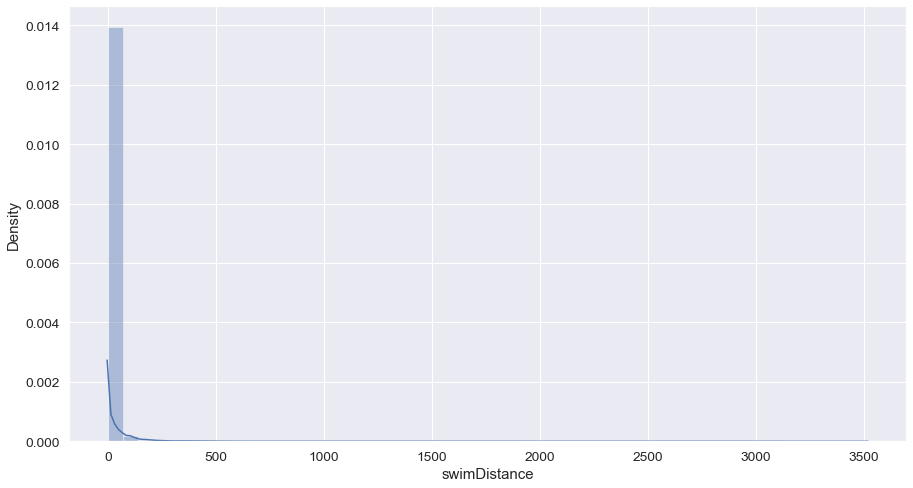

In [56]:
show_distplot('swimDistance')

In [57]:
# How can you swim for more than 2 km without breathing?
train[train['swimDistance'] >= 2000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
140702,c2e9e5631f4e54,23213058f83abe,f01eb1073ef377,0,5,78.120003,1,0,1,47,...,2295.0,0,0,1002.000,4,1466,0.9592,3297.000000,0.000000,False
217274,ba5e3dfb5a0fa0,383db055216ec2,d6e13468e28ab4,0,4,53.320000,0,0,16,39,...,2148.0,0,0,2276.000,5,0,0.9600,10113.000000,0.000000,False
795688,d50c9d0e65fe2a,4996575c11abcb,668402592429f8,0,1,503.000000,4,3,1,6,...,2718.0,0,0,4691.000,5,1516,1.0000,10740.000000,1.000000,False
1495714,bd8cc3083a9923,1d5d17140d6fa4,8e2e6022d6e5c8,0,0,0.000000,0,0,0,47,...,2484.0,0,0,1966.000,3,0,0.5833,5314.000000,0.000000,False
1635774,312ccbb27b99aa,47c7f4d69e2fb1,b4b11756321f3a,1,3,49.590000,0,0,5,48,...,3514.0,0,0,4296.000,8,1492,0.8511,9899.000000,0.000000,False
1842892,8773d0687c6aae,b17f46f9f6666c,56ee5897512c86,3,1,474.399994,2,0,0,7,...,2387.0,0,0,7.546,6,0,1.0000,2394.545898,0.000000,False
2204803,a8653b87e83892,383db055216ec2,d6e13468e28ab4,1,4,843.799988,5,5,2,2,...,2206.0,0,0,4687.000,4,0,0.9600,9926.000000,0.714286,False
2660011,3713b36e1ba9e1,1f7aed9240864a,584447ed875c85,0,0,0.000000,0,0,0,77,...,2338.0,0,0,1750.000,0,1518,0.2143,4088.000000,0.000000,False
2781641,aff482b8c08486,383db055216ec2,d6e13468e28ab4,0,4,109.800003,0,0,18,40,...,2124.0,0,0,3973.000,5,0,0.9600,9809.000000,0.000000,False
3271100,2496e3223a8b5d,78980ab36f7642,23ec7dd5546022,0,0,0.000000,0,0,0,83,...,2382.0,0,0,1534.000,0,0,0.0851,3916.000000,0.000000,False


In [58]:
# Remove outliers
train.drop(train[train['swimDistance'] >= 2000].index, inplace=True)

![](https://i.imgur.com/hxbfBFI.gif)

## Anomalies detection in Supplies (WeaponAcquired)

> Most people acquire between 0 and 10 weapons in a game, but you also see some people acquire more than 80 weapons! Let's check these guys out.

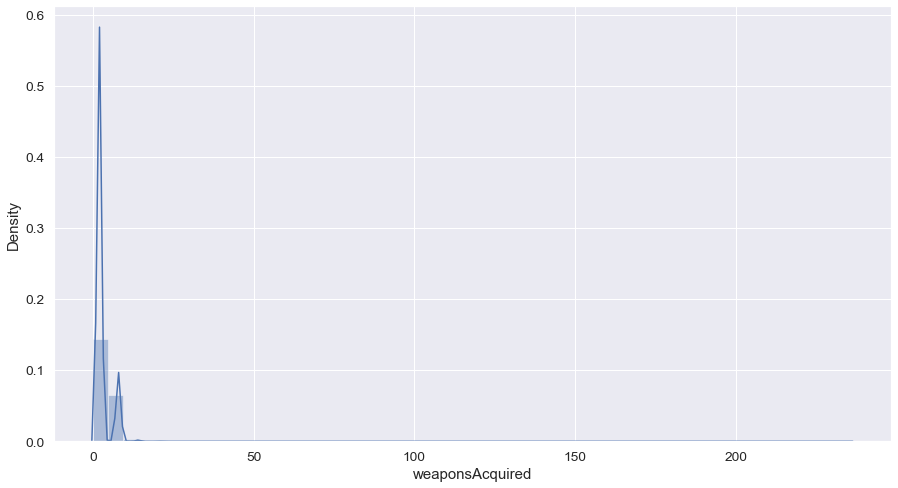

In [59]:
show_distplot('weaponsAcquired')

In [60]:
display(train[train['weaponsAcquired'] >= 80].shape)
train[train['weaponsAcquired'] >= 80].head()

(18, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
184896,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0,67.110001,0,0,0,44,...,0.000000,0,0,1307.000000,128,1577,0.7111,3187.000000,0.000000,False
465645,c58e3e0c2ba678,3d3e6100c07ff0,d04dbb98249f76,0,1,175.300003,1,0,2,48,...,0.000000,0,0,1687.000000,80,0,0.7500,1687.000000,0.000000,False
1137527,8f0c855d23e4cd,679c3316056de8,fbaf1b3ae1d884,1,0,100.000000,0,0,0,24,...,47.209999,0,0,2400.000000,102,0,0.8929,5299.209961,0.000000,False
1146892,db54cf45b9ed1c,898fccaeeb041d,484b4ae51fe80f,0,0,0.000000,0,0,0,54,...,0.000000,0,0,653.099976,95,0,0.5600,653.099976,0.000000,False
1157572,be4ff9afaa5bb1,abb73dd57619fa,f900de1ec39fa5,22,0,5377.000000,0,8,4,3,...,0.000000,0,0,1128.000000,83,0,0.8000,2082.399902,0.150943,False


In [61]:
# Remove outliers
train.drop(train[train['weaponsAcquired'] >= 80].index, inplace=True)

##Anomalies in Heals

Most players us 5 healing items or less. We can again recognize some weird anomalies

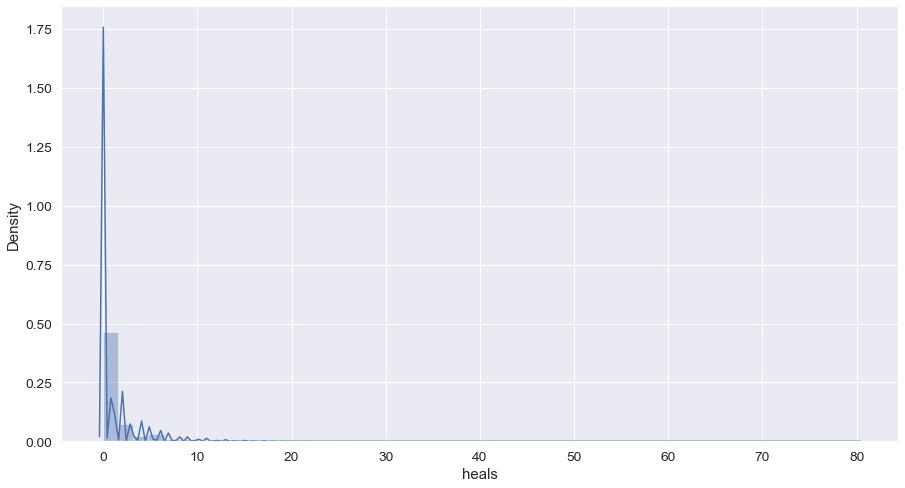

In [62]:
show_distplot('heals')

In [63]:
# 40 or more healing items used
display(train[train['heals'] >= 40].shape)
train[train['heals'] >= 40].head(10)

(106, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
14621,63ab976895d860,927eeba5614c4f,69473402649f11,0,2,0.0,0,0,47,43,...,0.000000,0,0,1387.000000,6,0,0.9368,6854.000000,0.000000,False
43146,069ddee7c9d26a,58ab5a1ce8e06f,942416b6caf21e,1,4,182.0,0,1,43,21,...,292.399994,0,0,2791.000000,7,0,0.9615,3083.399902,1.000000,False
100067,c45bd6917146e2,81ab9f863957cb,4335664c6716fa,0,2,0.0,0,0,52,49,...,3.443000,0,0,1340.000000,3,1543,0.8333,1343.442993,0.000000,False
205436,86910c38335c2f,2738398928d28c,7d2911e944bfaa,0,10,0.0,0,0,42,45,...,0.000000,0,0,1510.000000,6,0,0.8646,7444.000000,0.000000,False
212899,a007734fbc6ebf,5bf702dfa1e5d4,ad6b5669d33a2c,0,5,0.0,0,0,48,43,...,0.000000,0,0,1968.000000,9,0,0.8370,5816.000000,0.000000,False
213192,a0891dbc2950ea,dde848d90491ba,b4fd3348551b73,0,2,0.0,0,0,42,44,...,0.000000,0,0,2439.000000,2,1511,0.9259,2439.000000,0.000000,False
225199,91a2fb00455eb3,f639b09774c5b1,65b73c71653822,0,3,123.0,0,0,40,52,...,0.000000,0,0,2252.000000,8,0,0.8276,4848.000000,0.000000,False
237795,1f4f2efc86bfcb,3d668492d1fca9,d3638466a43d38,0,6,175.0,2,1,47,25,...,0.000000,0,0,2928.000000,3,1562,0.9355,3415.600098,1.000000,False
277051,7725ad71ad2ff7,4b2a7cf86d1546,cfa2775c9ef944,3,0,2348.0,0,8,41,9,...,0.000000,0,0,268.799988,33,1500,0.8889,268.799988,0.296296,False
359681,6c55f4a0c9abf7,0e8c11d4f2373a,bc0405a14a18c4,0,8,100.0,0,1,42,23,...,0.000000,0,0,1517.000000,7,0,0.8229,5224.000000,1.000000,False


In [64]:
# Remove outliers
train.drop(train[train['heals'] >= 40].index, inplace=True)

In [65]:
train.shape

(3442564, 32)

In [66]:
train.to_csv('/Users/mac/Desktop/Maching learing/Final_project/课程项目数据集/题目一/cleaned_data.csv', index=False)

In [67]:
# import pandas as pd
cleaned_data = pd.read_csv('/Users/mac/Desktop/Maching learing/Final_project/课程项目数据集/题目一/cleaned_data.csv')
cleaned_data = reduce_mem_usage(cleaned_data)

Memory usage of dataframe is 817.49 MB --> 298.76 MB (Decreased by 63.5%)


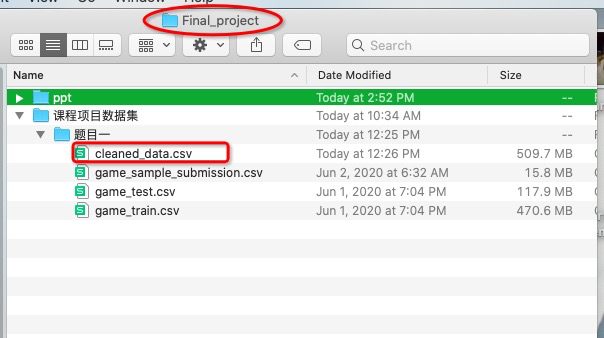

# Part 3: Feature Engineering¶

##Experiment: Adding/Removing some new Features and finding thier correlation with the winPlacePer

A game in PUBG can have up to 100 players fighting each other. But most of the times a game isn't "full". There is no variable that gives us the number of players joined. So lets create one.

In [68]:
cleaned_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
0,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,...,11.04,0,0,1434.000000,5,0,0.6400,1445.044556,0.0,0.0
1,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,...,0.00,0,0,161.800003,2,0,0.7755,161.800003,0.0,0.0
2,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,...,0.00,0,0,202.699997,3,0,0.1667,202.699997,0.0,0.0
3,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,...,0.00,0,0,49.750000,2,0,0.1875,49.750000,0.0,0.0
4,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000000,0,0,0,96,...,0.00,0,0,13.500000,1,1497,0.0000,13.500000,0.0,0.0


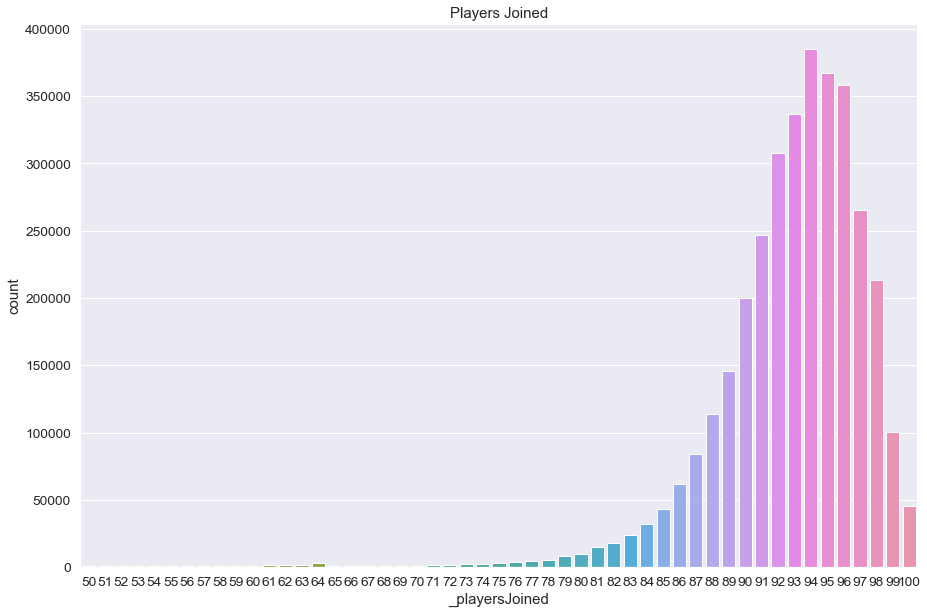

In [69]:
cleaned_data['_playersJoined'] = cleaned_data.groupby('matchId')['matchId'].transform('count')
data = cleaned_data.copy()
data = data[data['_playersJoined']>49]
plt.figure(figsize=(15,10))
sns.countplot(data['_playersJoined'])
plt.title("Players Joined",fontsize=15)
plt.show()

There are a few matches with less than 75 players that cannot be displayed here. As we can see most of the matches are nearly packed and have almost 100 players.

###Normalizing the features
Now that we have a feature '_playersJoined' we can normalize other features based on the amount of players. Features that can be valuable to normalize are:

- kills
- damageDealt
- maxPlace
- matchDuration

In [70]:
# Create normalized features
cleaned_data['_killsNorm'] = cleaned_data['kills']*((100-cleaned_data['_playersJoined'])/100 + 1)
cleaned_data['_damageDealtNorm'] = cleaned_data['damageDealt']*((100-cleaned_data['_playersJoined'])/100 + 1)
cleaned_data['_maxPlaceNorm'] = cleaned_data['maxPlace']*((100-cleaned_data['_playersJoined'])/100 + 1)
cleaned_data['_matchDurationNorm'] = cleaned_data['matchDuration']*((100-cleaned_data['_playersJoined'])/100 + 1)
# Compare standard features and normalized features
to_show = ['Id', 'kills','_killsNorm','damageDealt', '_damageDealtNorm', 'maxPlace', '_maxPlaceNorm', 'matchDuration', '_matchDurationNorm']
cleaned_data[to_show][0:11]


,Id,kills,_killsNorm,damageDealt,_damageDealtNorm,maxPlace,_maxPlaceNorm,matchDuration,_matchDurationNorm
0,eef90569b9d03c,0,0.00,91.470001,100.617001,26,28.60,1777,1954.70
1,1eaf90ac73de72,0,0.00,68.000000,72.760000,50,53.50,1318,1410.26
2,4616d365dd2853,0,0.00,32.900002,35.861002,31,33.79,1436,1565.24
3,315c96c26c9aac,1,1.06,100.000000,106.000000,97,102.82,1424,1509.44
4,95959be0e21ca3,0,0.00,0.000000,0.000000,28,28.84,1316,1355.48
5,311b84c6ff4390,0,0.00,8.538000,9.221040,96,103.68,1967,2124.36
6,1a68204ccf9891,0,0.00,51.599998,54.179998,28,29.40,1375,1443.75
7,e5bb5a43587253,0,0.00,37.270000,40.251600,29,31.32,1930,2084.40
8,8de328a74658a9,0,0.00,137.899994,148.931993,48,51.84,1384,1494.72
9,ce4f6ac165705e,0,0.00,0.000000,0.000000,29,32.19,1774,1969.14


In [71]:
match = cleaned_data.groupby('matchId')
cleaned_data['_killsPerc'] = match['kills'].rank(pct=True).values
cleaned_data['_killPlacePerc'] = match['killPlace'].rank(pct=True).values
cleaned_data['_walkDistancePerc'] = match['walkDistance'].rank(pct=True).values
cleaned_data['_damageDealtPerc'] = match['damageDealt'].rank(pct=True).values
cleaned_data['_walkPerc_killsPerc'] = cleaned_data['_walkDistancePerc'] / cleaned_data['_killsPerc']
cleaned_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,_playersJoined,_killsNorm,_damageDealtNorm,_maxPlaceNorm,_matchDurationNorm,_killsPerc,_killPlacePerc,_walkDistancePerc,_damageDealtPerc,_walkPerc_killsPerc
0,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,...,90,0.00,100.617001,28.60,1954.70,0.250000,0.633333,0.555556,0.433333,2.222222
1,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,...,93,0.00,72.760000,53.50,1410.26,0.279570,0.505376,0.344086,0.419355,1.230769
2,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,...,91,0.00,35.861002,33.79,1565.24,0.274725,0.824176,0.230769,0.296703,0.840000
3,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,...,94,1.06,106.000000,102.82,1509.44,0.659574,0.478723,0.180851,0.563830,0.274194
4,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000000,0,0,0,96,...,97,0.00,0.000000,28.84,1355.48,0.288660,0.989691,0.030928,0.134021,0.107143


In [72]:
corr = cleaned_data[['_killsPerc', '_killPlacePerc','_walkDistancePerc','_damageDealtPerc', '_walkPerc_killsPerc','winPlacePerc']].corr()

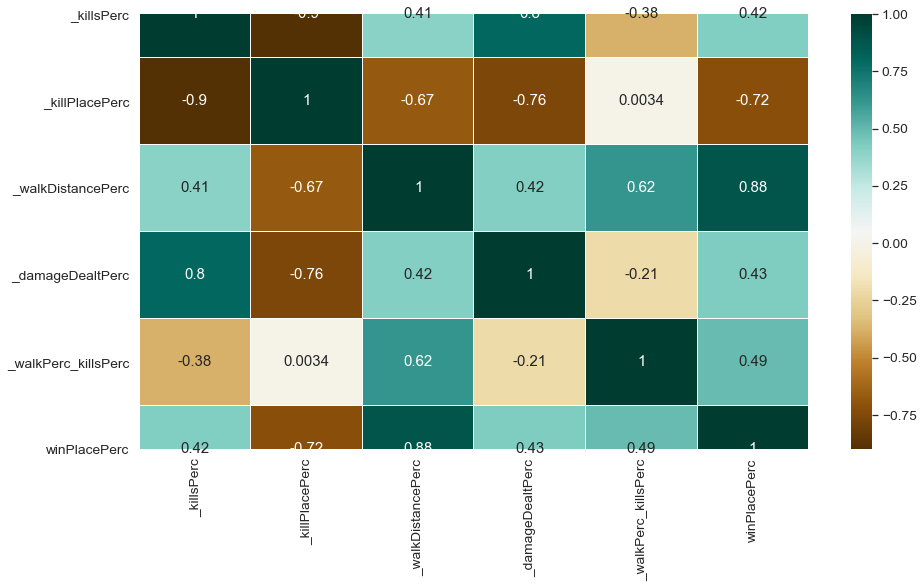

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    linecolor='white',
    linewidths=0.1,
    cmap="BrBG"
)
plt.show()

In [74]:
agg = cleaned_data.groupby(['groupId']).size().to_frame('players_in_team')
cleaned_data = cleaned_data.merge(agg, how='left', on=['groupId'])
cleaned_data['_healthItems'] = cleaned_data['heals'] + cleaned_data['boosts']
cleaned_data['_headshotKillRate'] = cleaned_data['headshotKills'] / cleaned_data['kills']
cleaned_data['_killPlaceOverMaxPlace'] = cleaned_data['killPlace'] / cleaned_data['maxPlace']
cleaned_data['_killsOverWalkDistance'] = cleaned_data['kills'] / cleaned_data['walkDistance']
cleaned_data['_killsOverDistance'] = cleaned_data['kills'] / cleaned_data['_totalDistance']
cleaned_data['_walkDistancePerSec'] = cleaned_data['walkDistance'] / cleaned_data['matchDuration']
cleaned_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,_walkDistancePerc,_damageDealtPerc,_walkPerc_killsPerc,players_in_team,_healthItems,_headshotKillRate,_killPlaceOverMaxPlace,_killsOverWalkDistance,_killsOverDistance,_walkDistancePerSec
0,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,...,0.555556,0.433333,2.222222,4,0,NaN,2.192308,0.000000,0.000000,0.806978
1,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,...,0.344086,0.419355,1.230769,2,0,NaN,0.940000,0.000000,0.000000,0.122762
2,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,...,0.230769,0.296703,0.840000,1,0,NaN,2.419355,0.000000,0.000000,0.141156
3,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,...,0.180851,0.563830,0.274194,1,0,0.0,0.463918,0.020101,0.020101,0.034937
4,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000000,0,0,0,96,...,0.030928,0.134021,0.107143,6,0,NaN,3.428571,0.000000,0.000000,0.010258


In [75]:
corr = cleaned_data[['killPlace', 'walkDistance','players_in_team','_healthItems', '_headshotKillRate', '_killPlaceOverMaxPlace', '_killsOverWalkDistance', '_killsOverDistance','_walkDistancePerSec','winPlacePerc']].corr()

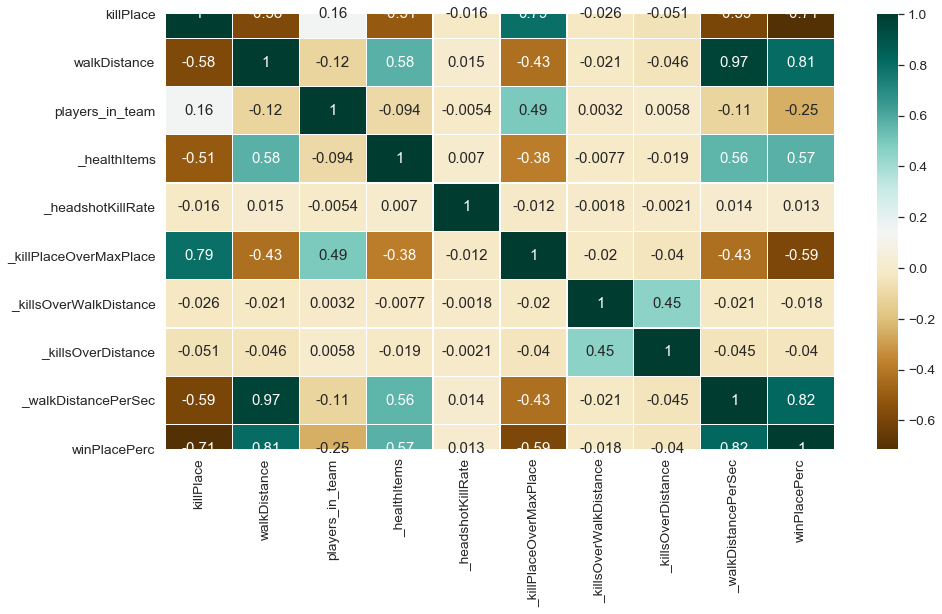

In [76]:
plt.figure(figsize=(15,8))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    linecolor='white',
    linewidths=0.1,
    cmap="BrBG"
)
plt.show()

In [77]:
cleaned_data.shape

(3442564, 49)

In [78]:
cleaned_data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', '_totalDistance',
       '_headshot_rate', '_killsWithoutMoving', '_playersJoined', '_killsNorm',
       '_damageDealtNorm', '_maxPlaceNorm', '_matchDurationNorm', '_killsPerc',
       '_killPlacePerc', '_walkDistancePerc', '_damageDealtPerc',
       '_walkPerc_killsPerc', 'players_in_team', '_healthItems',
       '_headshotKillRate', '_killPlaceOverMaxPlace', '_killsOverWalkDistance',
       '_killsOverDistance', '_walkDistancePerSec'],
      dtype='object')

In [79]:
cleaned_data.drop(['_headshotKillRate','_killsOverDistance', '_killsOverWalkDistance', ], axis=1, inplace=True)

In [80]:
cleaned_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,_matchDurationNorm,_killsPerc,_killPlacePerc,_walkDistancePerc,_damageDealtPerc,_walkPerc_killsPerc,players_in_team,_healthItems,_killPlaceOverMaxPlace,_walkDistancePerSec
0,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,...,1954.70,0.250000,0.633333,0.555556,0.433333,2.222222,4,0,2.192308,0.806978
1,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,...,1410.26,0.279570,0.505376,0.344086,0.419355,1.230769,2,0,0.940000,0.122762
2,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,...,1565.24,0.274725,0.824176,0.230769,0.296703,0.840000,1,0,2.419355,0.141156
3,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,...,1509.44,0.659574,0.478723,0.180851,0.563830,0.274194,1,0,0.463918,0.034937
4,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000000,0,0,0,96,...,1355.48,0.288660,0.989691,0.030928,0.134021,0.107143,6,0,3.428571,0.010258


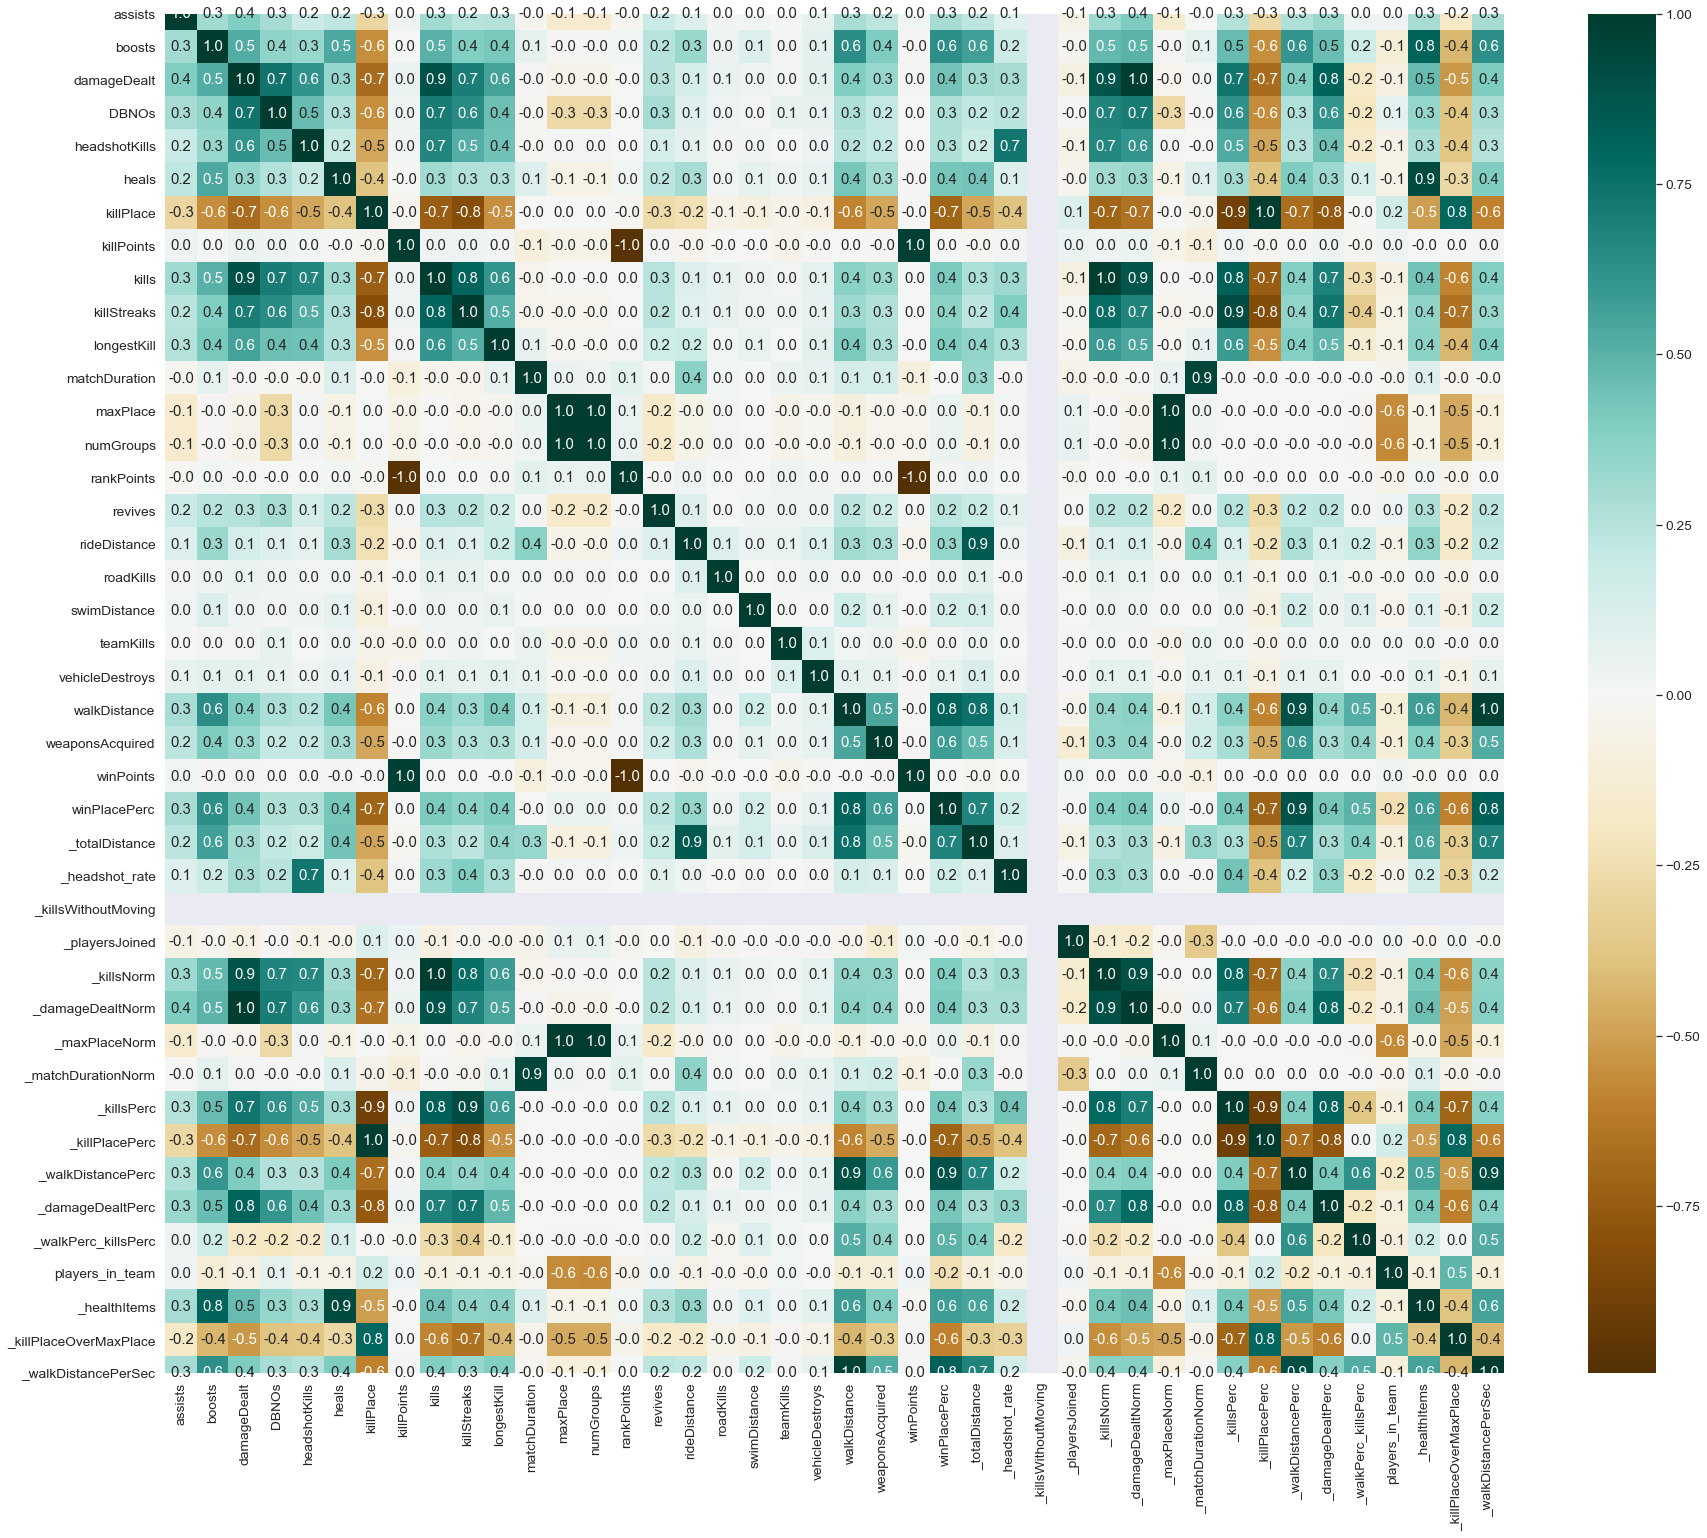

In [81]:
cols_to_fit = [col for col in cleaned_data.columns]
corr = cleaned_data[cols_to_fit].corr()
f,ax = plt.subplots(figsize=(30, 25))
sns.heatmap(cleaned_data[cols_to_fit].corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

##Removing features having 0 correlation with winPlacePerc

In [82]:
cleaned_data.drop(['killPoints','matchDuration','maxPlace','numGroups','rankPoints','roadKills','teamKills','winPoints', '_playersJoined', '_maxPlaceNorm', '_matchDurationNorm', '_killsWithoutMoving'], axis=1, inplace=True)

In [83]:
cleaned_data.shape

(3442564, 34)

###Modifying the test data

In [84]:
test.shape

(927005, 28)

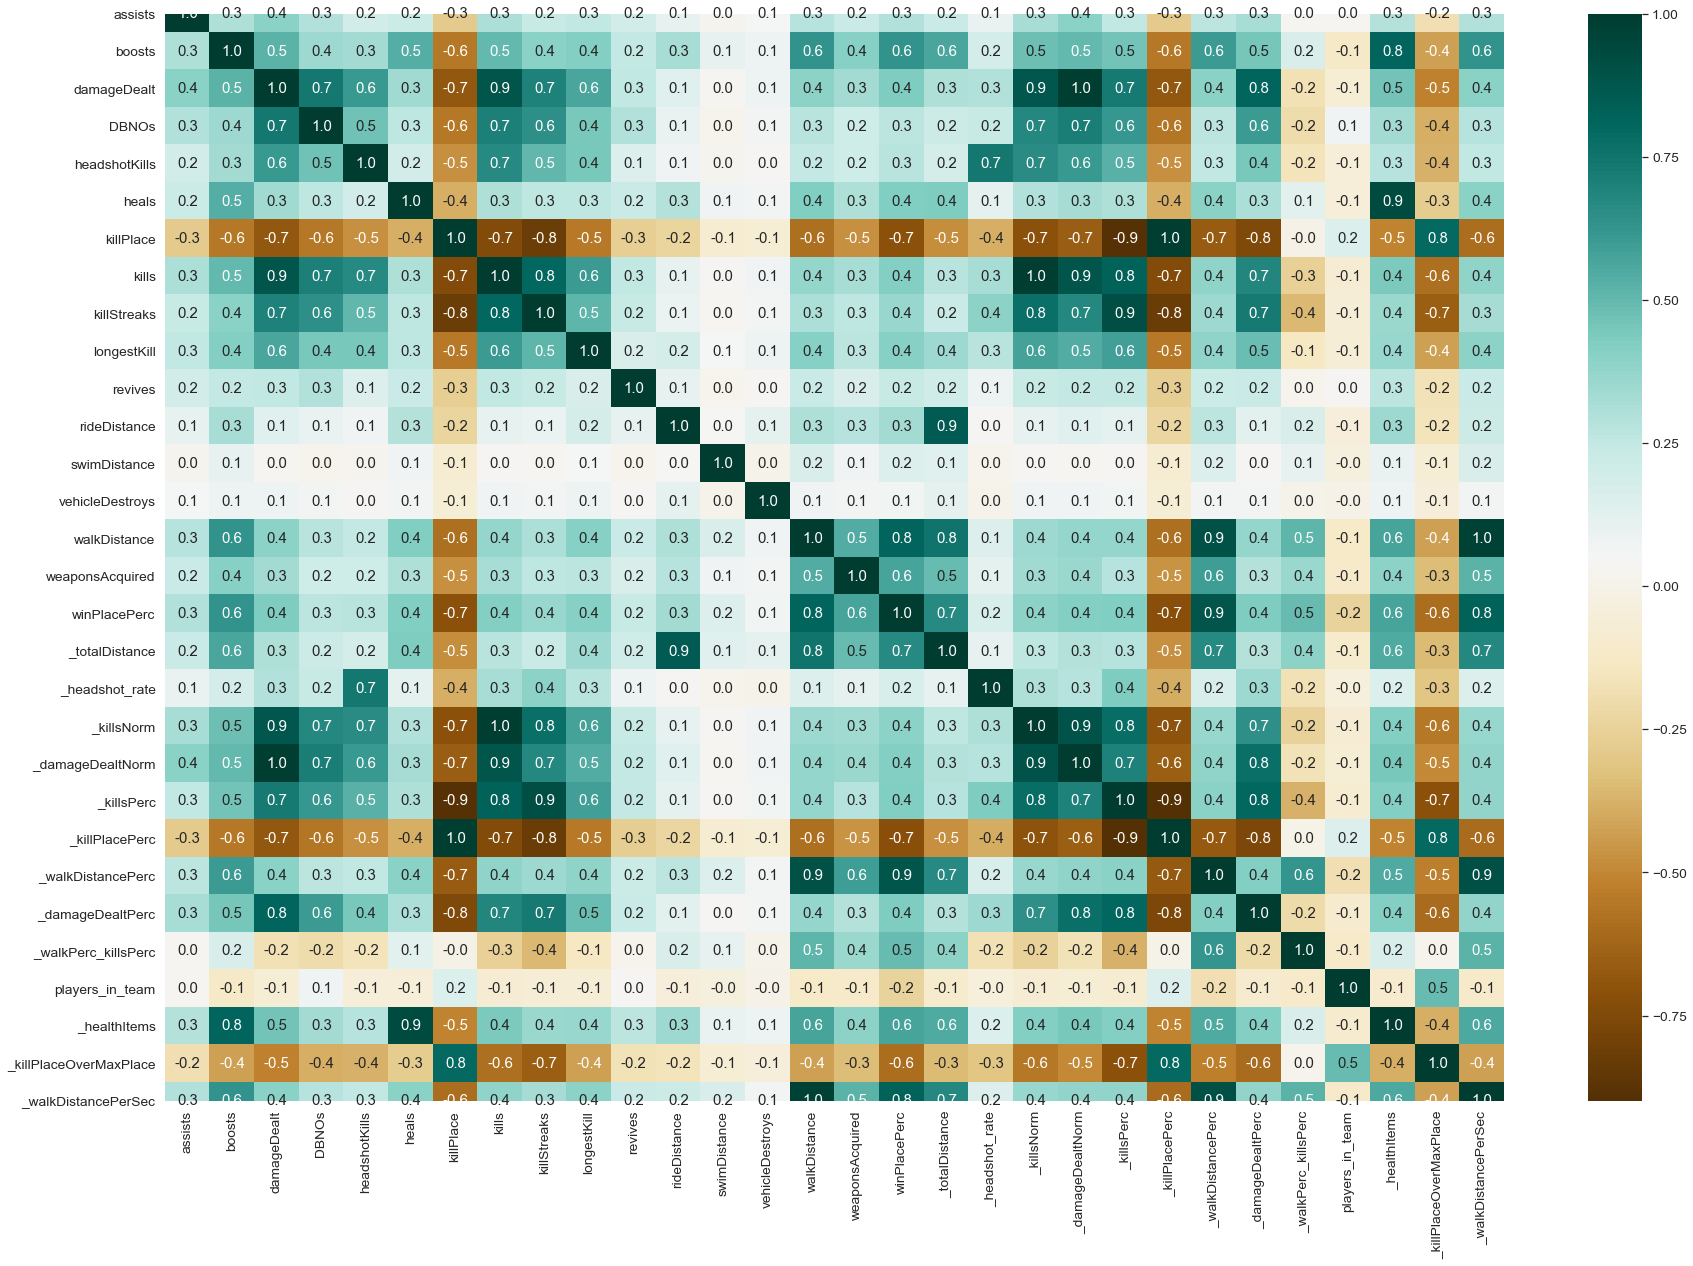

In [85]:
cols_to_fit = [col for col in cleaned_data.columns]
corr = cleaned_data[cols_to_fit].corr()
f,ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr, annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

In [86]:
#saving highly correlated data
cleaned_data.to_csv(  '/Users/mac/Desktop/Maching learing/Final_project/课程项目数据集/题目一/Highly_correlated_data.csv', index=False)

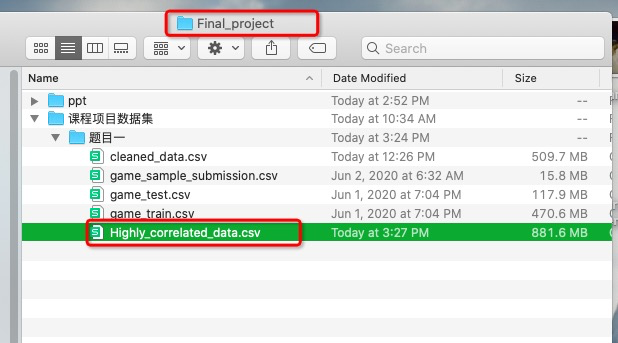

# #Part 4: Final Prediction

In [87]:
highly_corr = pd.read_csv('/Users/mac/Desktop/Maching learing/Final_project/课程项目数据集/题目一/Highly_correlated_data.csv')
highly_corr = reduce_mem_usage(highly_corr)

Memory usage of dataframe is 893.00 MB --> 370.99 MB (Decreased by 58.5%)


In [88]:
highly_corr.shape

(3442564, 34)

In [89]:
X_train = highly_corr[highly_corr['winPlacePerc'].notnull()].reset_index(drop=True)
X_test = highly_corr[highly_corr['winPlacePerc'].isnull()].drop(['winPlacePerc'], axis=1).reset_index(drop=True)


Y_train = X_train.pop('winPlacePerc')
X_test_grp = X_test[['matchId','groupId']].copy()
train_matchId = X_train['matchId']

# drop matchId,groupId
X_train.drop(['matchId','groupId','Id'], axis=1, inplace=True)
X_test.drop(['matchId','groupId','Id'], axis=1, inplace=True)

print(X_train.shape, X_test.shape)

(3442564, 30) (0, 30)


## Dealing with Categorical Variables

We will one hot encode the 'matchType' feature to use it in our Random Forest model.

In [90]:
print('There are {} different Match types in the dataset.'.format(highly_corr['matchType'].nunique()))

There are 3 different Match types in the dataset.


In [91]:
# One hot encode matchType
highly_corr = pd.get_dummies(highly_corr, columns=['matchType'])

# Take a look at the encoding
matchType_encoding = highly_corr.filter(regex='matchType')
matchType_encoding.head()

,matchType_duo,matchType_solo,matchType_squad
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [92]:
# Turn groupId and match Id into categorical types
highly_corr['groupId'] = highly_corr['groupId'].astype('category')
highly_corr['matchId'] = highly_corr['matchId'].astype('category')

# Get category coding for groupId and matchID
highly_corr['groupId_cat'] = highly_corr['groupId'].cat.codes
highly_corr['matchId_cat'] = highly_corr['matchId'].cat.codes

# Get rid of old columns
highly_corr.drop(columns=['groupId', 'matchId'], inplace=True)

# Lets take a look at our newly created features
highly_corr[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
0,651530,25905
1,663809,2491
2,1054599,35746
3,1383234,16193
4,276765,24881


In [93]:
# Drop Id column, because it probably won't be useful for our Machine Learning algorithm,
# because the test set contains different Id's
highly_corr.drop(columns = ['Id'], inplace=True)

## Getting prepared for Machine Learning  

In [94]:
# Take sample for debugging and exploration
sample = 500000
df_sample = highly_corr.sample(sample)

## Split target variable, validation data

In [95]:
#Split sample into training data and target variable
df = df_sample.drop(columns = ['winPlacePerc']) #all columns except target
y = df_sample['winPlacePerc'] # Only target variable

In [96]:
# Function for splitting training and validation data
def split_vals(a, n : int): 
    return a[:n].copy(), a[n:].copy()
val_perc = 0.12 # % to use for validation set
n_valid = int(val_perc * sample) 
n_trn = len(df)-n_valid
# Split data
raw_train, raw_valid = split_vals(df_sample, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

# Check dimensions of samples
print('Sample train shape: ', X_train.shape, 
      'Sample target shape: ', y_train.shape, 
      'Sample validation shape: ', X_valid.shape)

Sample train shape:  (440000, 34) Sample target shape:  (440000,) Sample validation shape:  (60000, 34)


## Defining function for calculating Mean Absolute Error (MAE)

In [97]:
# Metric used for the PUBG competition (Mean Absolute Error (MAE))
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Function to print the MAE (Mean Absolute Error) score

def print_score(m : RandomForestRegressor):
    res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(m.predict(X_valid), y_valid)]
    #Score of the training dataset obtained using an out-of-bag estimate.
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

## Creating a basic Random Forest Model

In [98]:
# Train basic model
m1 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt', n_jobs=-1)
m1.fit(X_train, y_train)
print_score(m1)

['mae train: ', 0.030935090605581788, 'mae val: ', 0.05155508249846296]


## Finding Feature Importance using Random Forest

In [99]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

In [100]:
# What are the most predictive features according to our basic random forest model
fi = rf_feat_importance(m1, df); fi[:15]

,cols,imp
28,_walkDistancePerSec,0.168601
22,_walkDistancePerc,0.139011
16,_totalDistance,0.120042
21,_killPlacePerc,0.106952
6,killPlace,0.104352
14,walkDistance,0.101993
1,boosts,0.052261
24,_walkPerc_killsPerc,0.047870
27,_killPlaceOverMaxPlace,0.036090
9,longestKill,0.026042


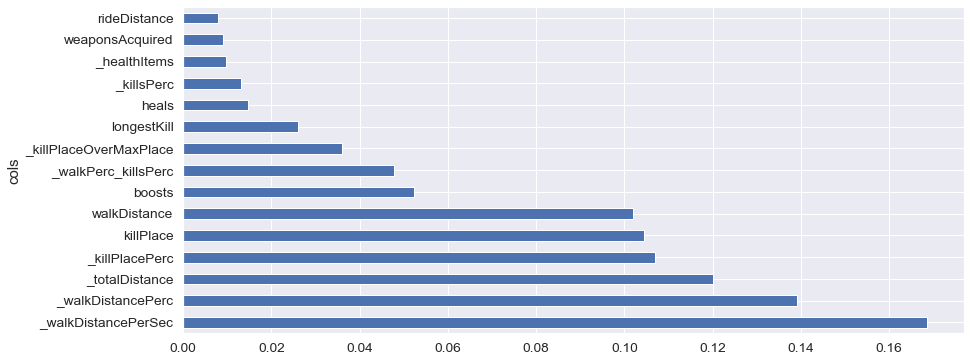

In [101]:
# Plot a feature importance graph for the 20 most important features
plot1 = fi[:15].plot('cols', 'imp', figsize=(14,6), legend=False, kind = 'barh')
plot1

In [102]:
X_train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'revives',
       'rideDistance', 'swimDistance', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', '_totalDistance', '_headshot_rate', '_killsNorm',
       '_damageDealtNorm', '_killsPerc', '_killPlacePerc', '_walkDistancePerc',
       '_damageDealtPerc', '_walkPerc_killsPerc', 'players_in_team',
       '_healthItems', '_killPlaceOverMaxPlace', '_walkDistancePerSec',
       'matchType_duo', 'matchType_solo', 'matchType_squad', 'groupId_cat',
       'matchId_cat'],
      dtype='object')

In [103]:
print(X_train.shape, y_train.shape)

(440000, 34) (440000,)


In [104]:
# Keep only significant features
to_keep = fi[fi.imp>0.005].cols
print('Significant features: ', len(to_keep))
to_keep

Significant features:  16


28       _walkDistancePerSec
22         _walkDistancePerc
16            _totalDistance
21            _killPlacePerc
6                  killPlace
14              walkDistance
1                     boosts
24       _walkPerc_killsPerc
27    _killPlaceOverMaxPlace
9                longestKill
5                      heals
20                _killsPerc
26              _healthItems
15           weaponsAcquired
11              rideDistance
25           players_in_team
Name: cols, dtype: object

In [105]:
# Make a DataFrame with only significant features
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

## Building a Random Forest Model with top features

In [106]:
# Train model on top features
m2 = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features='sqrt', n_jobs=-1)
m2.fit(X_train, y_train)
print_score(m2)

['mae train: ', 0.029294885201005438, 'mae val: ', 0.04964891828488688]


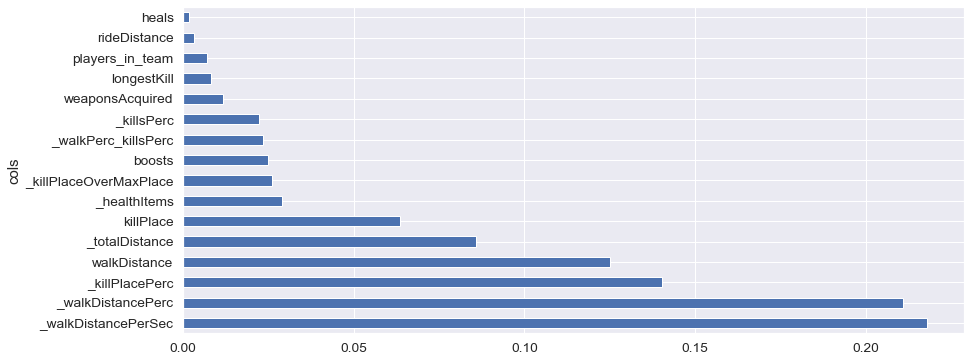

In [107]:
# Get feature importances of our top features
fi_to_keep = rf_feat_importance(m2, df_keep)
plot2 = fi_to_keep.plot('cols', 'imp', figsize=(14,6), legend=False, kind = 'barh')
plot2

###Generating a Dendogram to view highly correlated features

[]

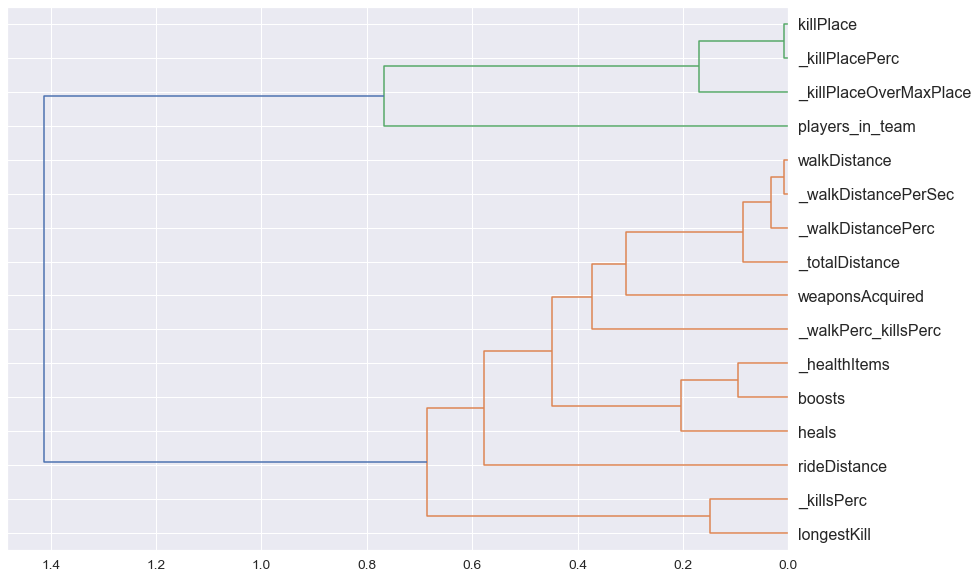

In [108]:
import scipy
from scipy.cluster import hierarchy as hc
# Create a Dendrogram to view highly correlated features
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(14,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.plot()

In [109]:
 #Defining a function get_sample to get random sample of n rows from dataframe(df), without replacement.
def get_sample(df,n):
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

In [110]:
!pip install pdpbox

In [111]:
!pip install pandas_summary

In [112]:
!pip install plotnine

In [113]:
df_keep.head()

,_walkDistancePerSec,_walkDistancePerc,_totalDistance,_killPlacePerc,killPlace,walkDistance,boosts,_walkPerc_killsPerc,_killPlaceOverMaxPlace,longestKill,heals,_killsPerc,_healthItems,weaponsAcquired,rideDistance,players_in_team
3052770,1.438130,0.696970,2061.800049,0.666667,66,1999.000000,0,2.603774,2.200000,0.000,0,0.267677,0,4,0.000000,4
1562415,0.397196,0.428571,552.500000,0.879121,80,552.500000,0,1.591837,2.962963,0.000,0,0.269231,0,3,0.000000,5
1202480,0.714421,0.583333,1338.000000,0.645833,62,980.900024,0,1.898305,2.214286,0.000,0,0.307292,0,2,357.100006,3
2693405,2.209720,0.946809,4183.000000,0.478723,45,4183.000000,1,3.423077,0.468750,0.000,0,0.276596,1,5,0.000000,1
1498645,0.359643,0.547368,2651.899902,0.336842,32,704.900024,0,0.776119,0.640000,8.766,0,0.705263,0,3,1947.000000,2


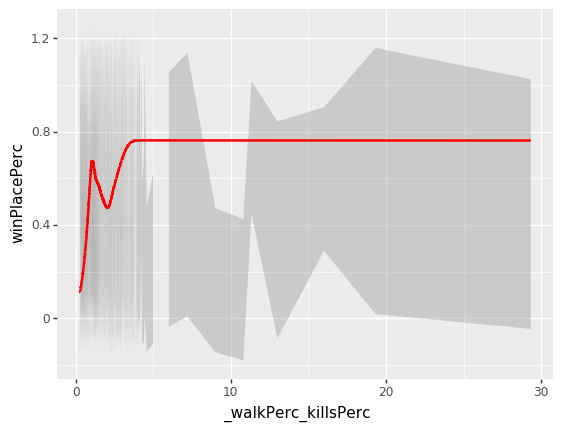

<ggplot: (8784660814192)>

In [114]:
# Plot the predictive quality of kills 
# from pdpbox import pdp
from plotnine import *
from pandas_summary import DataFrameSummary
x_all = get_sample(highly_corr, 100000)
ggplot(x_all, aes('_walkPerc_killsPerc','winPlacePerc'))+stat_smooth(se=True, colour='red', method='mavg')

In [ ]:
# Plot the predictive quality of walkDistance
x_all = get_sample(highly_corr, 100000)
ggplot(x_all, aes('_totalDistance','winPlacePerc'))+stat_smooth(se=True, colour='red', method='mavg')

In [ ]:
# Prepare data
train = highly_corr.copy()
val_perc_full = 0.20 # % to use for validation set
n_valid_full = int(val_perc_full * len(train)) 
n_trn_full = len(train)-n_valid_full
df_full = train.drop(columns = ['winPlacePerc']) # all columns except target
y = train['winPlacePerc'] # target variable
df_full = df_full[to_keep] # Keep only relevant features
X_train, X_valid = split_vals(df_full, n_trn_full)
y_train, y_valid = split_vals(y, n_trn_full)

# Check dimensions of data
print('Sample train shape: ', X_train.shape, 
      'Sample target shape: ', y_train.shape, 
      'Sample validation shape: ', X_valid.shape)

In [123]:
# Train final model
# You should get better results by increasing n_estimators
# and by playing around with the parameters
m3 = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1)
m3.fit(X_train, y_train)
print_score(m3)

['mae train: ', 0.026588469761755225, 'mae val: ', 0.04872969917578612]


In [ ]:
test.head()

In [ ]:
train.head()

In [117]:
test = pd.read_csv('/Users/mac/Desktop/Maching learing/Final_project/课程项目数据集/题目一/game_test.csv')
test = reduce_mem_usage(test)

Memory usage of dataframe is 198.03 MB --> 67.19 MB (Decreased by 66.1%)


In [118]:
#Adding same features to test data
agg = test.groupby(['groupId']).size().to_frame('players_in_team')
test = test.merge(agg, how='left', on=['groupId'])
test['_headshot_rate'] = test['headshotKills'] / test['kills']
test['_headshot_rate'] = test['_headshot_rate'].fillna(0)
test['_totalDistance'] = test['rideDistance'] + test['walkDistance'] + test['swimDistance']
test['_playersJoined'] = test.groupby('matchId')['matchId'].transform('count')
test['_killsNorm'] = test['kills']*((100-test['_playersJoined'])/100 + 1)
test['_damageDealtNorm'] = test['damageDealt']*((100-test['_playersJoined'])/100 + 1)
test['_healthItems'] = test['heals'] + test['boosts']
test['killsWithoutMoving'] = ((test['kills'] > 0) & (test['_totalDistance'] == 0))
test['_killPlacePerc'] = test['killPlace'].rank(pct=True).values
test['_killsPerc'] = test['kills'].rank(pct=True).values
test['_walkDistancePerc'] = test['walkDistance'].rank(pct=True).values
test['_walkPerc_killsPerc'] = test['_walkDistancePerc'] / test['_killsPerc']
test['_killPlaceOverMaxPlace'] = test['killPlace'] / test['maxPlace']
test['_killsPerc'] = test['kills'].rank(pct=True).values
test['_walkDistancePerc'] = test['walkDistance'].rank(pct=True).values
test['_walkDistancePerSec'] = test['walkDistance'] / test['matchDuration']

In [119]:
test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,_killsNorm,_damageDealtNorm,_healthItems,killsWithoutMoving,_killPlacePerc,_killsPerc,_walkDistancePerc,_walkPerc_killsPerc,_killPlaceOverMaxPlace,_walkDistancePerSec
0,8f728ac82e0a3b,bfccc4f56668b4,d6be13aa5c539c,0,0,119.199997,1,0,0,32,...,1.18,140.655996,0,False,0.337239,0.673317,0.577150,0.857175,0.780488,0.557090
1,b508541c84de09,6a6d2963bc4d7c,d6be13aa5c539c,0,3,192.699997,0,0,2,10,...,2.36,227.385996,5,False,0.102456,0.830329,0.979675,1.179864,0.243902,2.103558
2,13657bf3d29442,a7e874dd4513c2,d6be13aa5c539c,0,0,0.000000,0,0,0,65,...,0.00,0.000000,0,False,0.685426,0.284636,0.753704,2.647956,1.585366,1.062666
3,4c7ad07ed04ba4,260ba730e952e2,d6be13aa5c539c,0,3,67.849998,0,0,5,45,...,0.00,80.062998,8,False,0.474852,0.284636,0.677938,2.381772,1.097561,0.839087
4,58a25fa8b2c31c,74ac11949fd823,d6be13aa5c539c,0,3,141.000000,0,0,2,27,...,1.18,166.380000,5,False,0.284164,0.673317,0.703648,1.045048,0.658537,0.913436


In [120]:
# Turn groupId and match Id into categorical types
test['groupId'] = test['groupId'].astype('category')
test['matchId'] = test['matchId'].astype('category')

# Get category coding for groupId and matchID
test['groupId_cat'] = test['groupId'].cat.codes
test['matchId_cat'] = test['matchId'].cat.codes

In [121]:
# # Remove irrelevant features from the test set
test_pred = test[to_keep].copy()

# Fill NaN with 0 (temporary)
test_pred.fillna(0, inplace=True)
test_pred.head()

,_walkDistancePerSec,_walkDistancePerc,_totalDistance,_killPlacePerc,killPlace,walkDistance,boosts,_walkPerc_killsPerc,_killPlaceOverMaxPlace,longestKill,heals,_killsPerc,_healthItems,weaponsAcquired,rideDistance,players_in_team
0,0.557090,0.577150,1049.0,0.337239,32,1049.0,0,0.857175,0.780488,79.550003,0,0.673317,0,3,0.0,2
1,2.103558,0.979675,9011.0,0.102456,10,3961.0,3,1.179864,0.243902,126.900002,2,0.830329,5,5,5050.0,2
2,1.062666,0.753704,2001.0,0.685426,65,2001.0,0,2.647956,1.585366,0.000000,0,0.284636,0,3,0.0,5
3,0.839087,0.677938,3366.0,0.474852,45,1580.0,3,2.381772,1.097561,0.000000,5,0.284636,8,10,1786.0,2
4,0.913436,0.703648,5464.0,0.284164,27,1720.0,3,1.045048,0.658537,136.199997,2,0.673317,5,4,3744.0,2


## Predicting the final winPlacePerc

In [124]:
predictions = np.clip(a = m3.predict(test_pred), a_min = 0.0, a_max = 1.0)
pred_df = pd.DataFrame({'Id' : test['Id'], 'winPlacePerc' : predictions})
pred_df

,Id,winPlacePerc
0,8f728ac82e0a3b,0.483816
1,b508541c84de09,0.958812
2,13657bf3d29442,0.412267
3,4c7ad07ed04ba4,0.859727
4,58a25fa8b2c31c,0.767588
...,...,...
927000,a230188dbd3cb3,0.653940
927001,2778a1c5fe1026,0.320074
927002,03ec7eb09ef7e8,0.129300
927003,25694fbf622ce6,0.864495


In [127]:
# Create submission file
submission=pred_df.to_csv("/Users/mac/Desktop/Maching learing/Final_project/课程项目数据集/题目一/submission.csv", index=False)

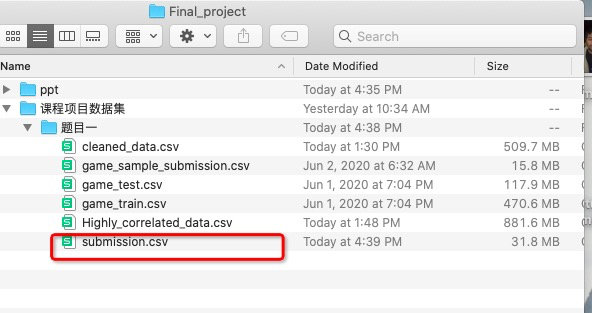